# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* `CLIENTNUM`: Client number. Unique identifier for the customer holding the account
* `Attrition_Flag`: <span style="color:red; font-weight:bold;">TARGET</span> Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* `Customer_Age`: Age in Years
* `Gender`: Gender of the account holder
* `Dependent_count`: Number of dependents
* `Education_Level`: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* `Marital_Status`: Marital Status of the account holder
* `Income_Category`: Annual Income Category of the account holder
* `Card_Category`: Type of Card
* `Months_on_book`: Period of relationship with the bank (in months)
* `Total_Relationship_Count`: Total no. of products held by the customer
* `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
* `Contacts_Count_12_mon`: No. of Contacts in the last 12 months
* `Credit_Limit`: Credit Limit on the Credit Card
* `Total_Revolving_Bal`: Total Revolving Balance on the Credit Card
* `Avg_Open_To_Buy`: Open to Buy Credit Line (Average of last 12 months)
* `Total_Amt_Chng_Q4_Q1`: Change in Transaction Amount (Q4 over Q1)
* `Total_Trans_Amt`: Total Transaction Amount (Last 12 months)
* `Total_Trans_Ct`: Total Transaction Count (Last 12 months)
* `Total_Ct_Chng_Q4_Q1`: Change in Transaction Count (Q4 over Q1)
* `Avg_Utilization_Ratio`: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


### <a name='toc'>Table Of Contents (toc)</a>

1. <a href = #dat>Data Overview</a>
2. <a href = #eda>Exploratory Data Analysis (eda)</a>
3. <a href = #pre>Data Pre-processing</a>
4. <a href = #imp>Missing value imputation</a>
5. <a href = #mod>Model Building (mod)</a>
6. <a href = #fin>Model Comparison and Final Model Selection</a>
7. <a href = #bus>Business Insights and Conclusions</a>
8. <a href = #act>Actionable Reccomendations</a>

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

%pip install xgboost
from xgboost import XGBClassifier

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix # Mistake: Need to add the import for confusion_matrix in order to be able to run the function for computation of confusion matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
df = data.copy()

## <a name='dat'>Data Overview</a> <a href = #toc>toc</a>

- Observations
- Sanity checks

In [4]:
df.shape

(10127, 21)

In [5]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3   12691.00000                  777      11914.00000   
1                      2    8256.00000                  864       7392.00000   
2                      0    3418.00000                    0       3418.00000   
3                      1    3313.00000                 2517        796.00000   
4                      0    4716.00000                    0       4716.00000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1.33500             1144              42              1.62500   
1               1.54100             1291              33              3.71400   
2               2.59400             1887              20              2.33300   
3               1.40500             1171              20              2.33300   
4               2.17500              816              28              2.50000   

   Avg_Utilization_Ratio  
0                0.06100  
1                0.10500  
2                0.00000  
3                0.76000  
4                0.00000

In [6]:
df.describe().T

count            mean            std  \
CLIENTNUM                10127.00000 739177606.33366 36903783.45023   
Customer_Age             10127.00000        46.32596        8.01681   
Dependent_count          10127.00000         2.34620        1.29891   
Months_on_book           10127.00000        35.92841        7.98642   
Total_Relationship_Count 10127.00000         3.81258        1.55441   
Months_Inactive_12_mon   10127.00000         2.34117        1.01062   
Contacts_Count_12_mon    10127.00000         2.45532        1.10623   
Credit_Limit             10127.00000      8631.95370     9088.77665   
Total_Revolving_Bal      10127.00000      1162.81406      814.98734   
Avg_Open_To_Buy          10127.00000      7469.13964     9090.68532   
Total_Amt_Chng_Q4_Q1     10127.00000         0.75994        0.21921   
Total_Trans_Amt          10127.00000      4404.08630     3397.12925   
Total_Trans_Ct           10127.00000        64.85869       23.47257   
Total_Ct_Chng_Q4_Q1      10127.00000         0.71222        0.23809   
Avg_Utilization_Ratio    10127.00000         0.27489        0.27569   

                                     min             25%             50%  \
CLIENTNUM                708082083.00000 713036770.50000 717926358.00000   
Customer_Age                    26.00000        41.00000        46.00000   
Dependent_count                  0.00000         1.00000         2.00000   
Months_on_book                  13.00000        31.00000        36.00000   
Total_Relationship_Count         1.00000         3.00000         4.00000   
Months_Inactive_12_mon           0.00000         2.00000         2.00000   
Contacts_Count_12_mon            0.00000         2.00000         2.00000   
Credit_Limit                  1438.30000      2555.00000      4549.00000   
Total_Revolving_Bal              0.00000       359.00000      1276.00000   
Avg_Open_To_Buy                  3.00000      1324.50000      3474.00000   
Total_Amt_Chng_Q4_Q1             0.00000         0.63100         0.73600   
Total_Trans_Amt                510.00000      2155.50000      3899.00000   
Total_Trans_Ct                  10.00000        45.00000        67.00000   
Total_Ct_Chng_Q4_Q1              0.00000         0.58200         0.70200   
Avg_Utilization_Ratio            0.00000         0.02300         0.17600   

                                     75%             max  
CLIENTNUM                773143533.00000 828343083.00000  
Customer_Age                    52.00000        73.00000  
Dependent_count                  3.00000         5.00000  
Months_on_book                  40.00000        56.00000  
Total_Relationship_Count         5.00000         6.00000  
Months_Inactive_12_mon           3.00000         6.00000  
Contacts_Count_12_mon            3.00000         6.00000  
Credit_Limit                 11067.50000     34516.00000  
Total_Revolving_Bal           1784.00000      2517.00000  
Avg_Open_To_Buy               9859.00000     34516.00000  
Total_Amt_Chng_Q4_Q1             0.85900         3.39700  
Total_Trans_Amt               4741.00000     18484.00000  
Total_Trans_Ct                  81.00000       139.00000  
Total_Ct_Chng_Q4_Q1              0.81800         3.71400  
Avg_Utilization_Ratio            0.50300         0.99900

In [7]:
# Get unique counts for each column
unique_counts = df.nunique()

# Display the result
print(unique_counts)

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to category dtype
df[object_columns] = df[object_columns].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [11]:
def get_value_counts(df):
    for column in df.columns:
        if df[column].dtype == 'category':
            print(f"Value counts for {column}:")
            # Loop through each unique value in the column
            for value in df[column].unique():
                value_counts = df[df[column] == value].shape[0]
                print(f"  {value}: {value_counts}")

In [12]:
get_value_counts(df)

Value counts for Attrition_Flag:
  Existing Customer: 8500
  Attrited Customer: 1627
Value counts for Gender:
  M: 4769
  F: 5358
Value counts for Education_Level:
  High School: 2013
  Graduate: 3128
  Uneducated: 1487
  nan: 0
  College: 1013
  Post-Graduate: 516
  Doctorate: 451
Value counts for Marital_Status:
  Married: 4687
  Single: 3943
  nan: 0
  Divorced: 748
Value counts for Income_Category:
  $60K - $80K: 1402
  Less than $40K: 3561
  $80K - $120K: 1535
  $40K - $60K: 1790
  $120K +: 727
  abc: 1112
Value counts for Card_Category:
  Blue: 9436
  Gold: 116
  Silver: 555
  Platinum: 20


In [13]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [14]:
 df.duplicated().sum()

0

In [15]:
# Specify the value you want to use for filtering
target = 'abc'

# Create a new DataFrame with rows where 'City' column matches the target value
filtered_df = df[df['Income_Category'] == target]

In [16]:
# Display the new DataFrame
get_value_counts(filtered_df)

Value counts for Attrition_Flag:
  Existing Customer: 925
  Attrited Customer: 187
Value counts for Gender:
  F: 1060
  M: 52
Value counts for Education_Level:
  Graduate: 332
  Uneducated: 185
  Doctorate: 70
  nan: 0
  College: 108
  Post-Graduate: 47
  High School: 225
Value counts for Marital_Status:
  Married: 493
  Single: 444
  Divorced: 93
  nan: 0
Value counts for Income_Category:
  abc: 1112
Value counts for Card_Category:
  Blue: 1045
  Silver: 53
  Platinum: 5
  Gold: 9


### Observation 

The majority of people with Income_Category of 'abc' are Females and have Blue Cards.
A disproportionate number of females didn't reveal enough information to determine an Income_Category
Otherwise the data distribution for 'abc' Income_Category look to be about the same distribution as the rest of the dataset. They could be removed but will wait until I check correlations.

In [17]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

## <a name='eda'>Exploratory Data Analysis (eda)</a> <a href = #toc>toc</a>

1. <a href = #uni>Univariate</a>
2. <a href = #biv>Bivariate</a>
3. <a href = #mul>Multivariate</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



Answers

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

##  <a name='uni'>Univariate</a> <a href = #eda>eda</a>

In [18]:
#get the amount of skewness of a list of integers
def get_skewness(list):
    skewness = list.mean() - list.median()
    return round(skewness, 2), "right" if skewness > 0 else "left" if skewness < 0 else "not"

In [19]:
amount, direction = get_skewness(df['Education_Level'].value_counts())
print(f'Education_Level is {direction} skewed, {amount}')

# Get the distribution (value counts) of the categorical column
amount, direction = get_skewness(df['Income_Category'].value_counts())
print(f'Income_Category is {direction} skewed, {amount}')

Education_Level is right skewed, 184.67
Income_Category is right skewed, 219.33


In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

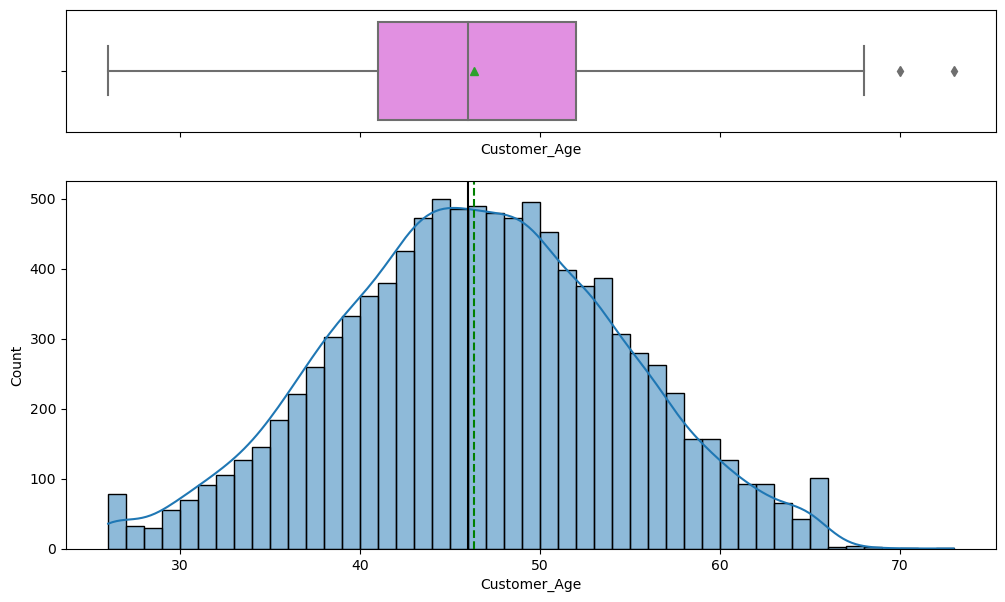

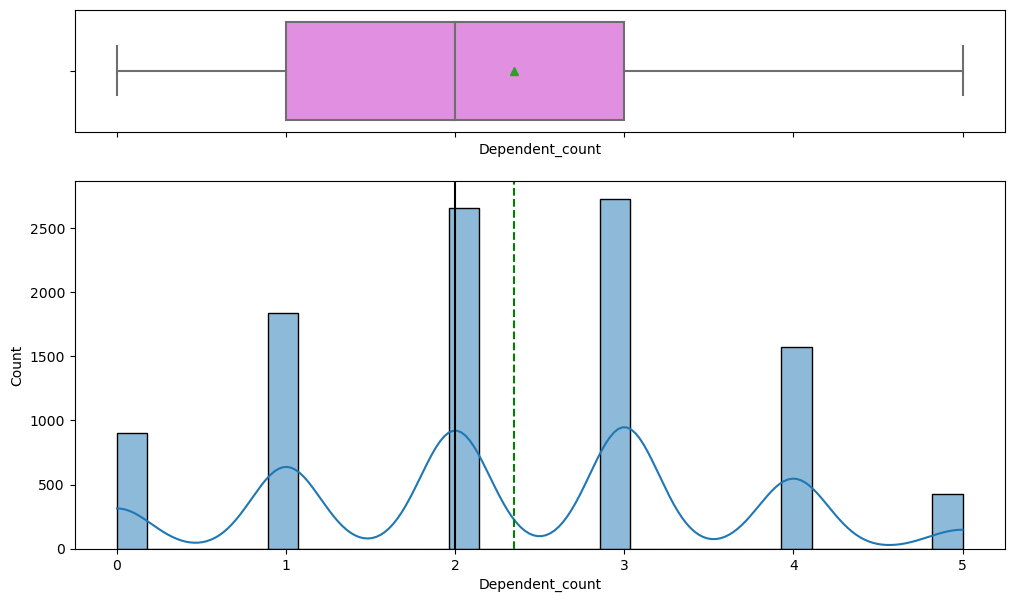

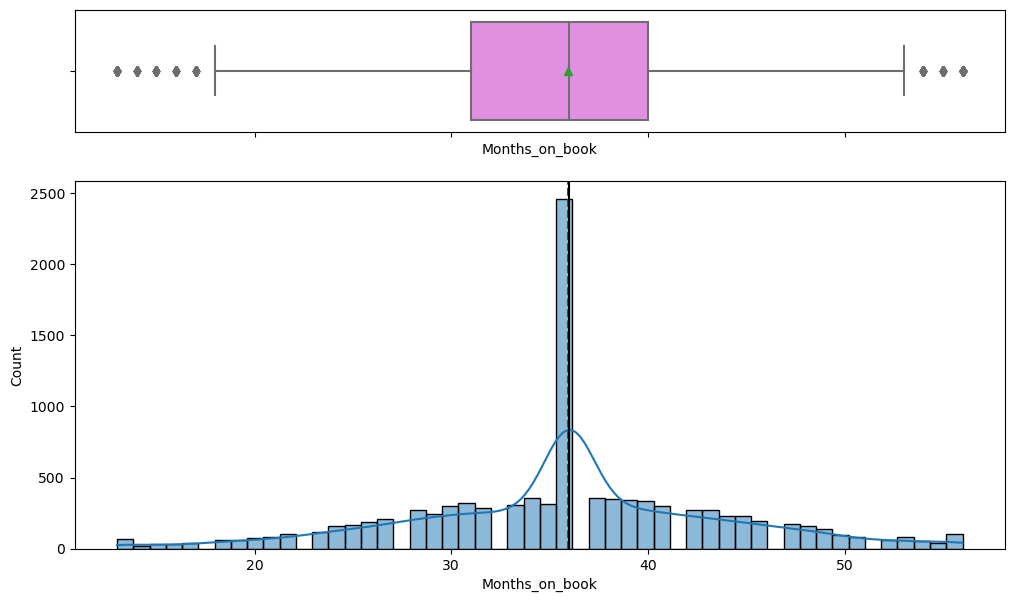

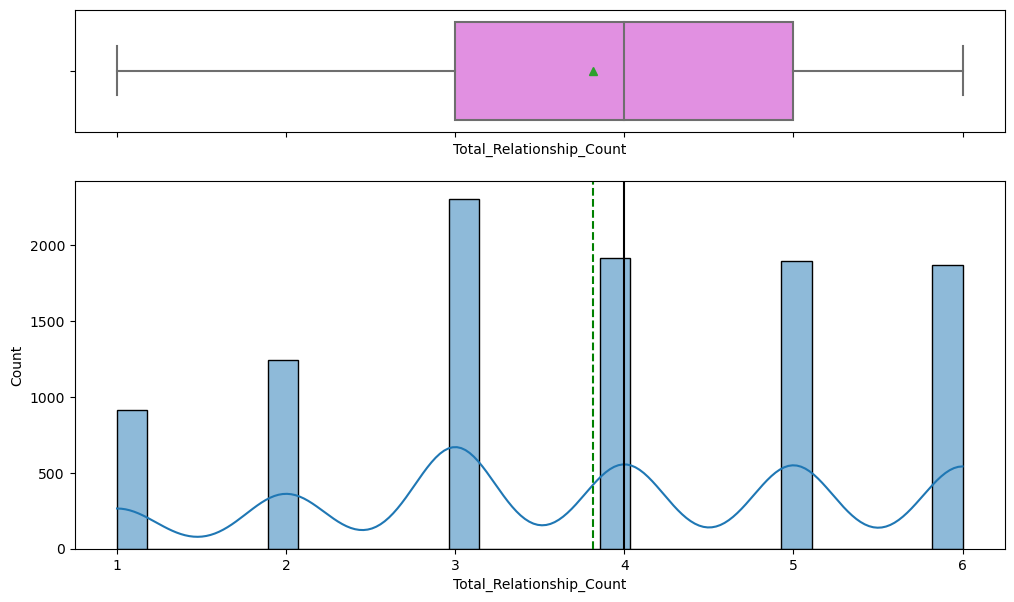

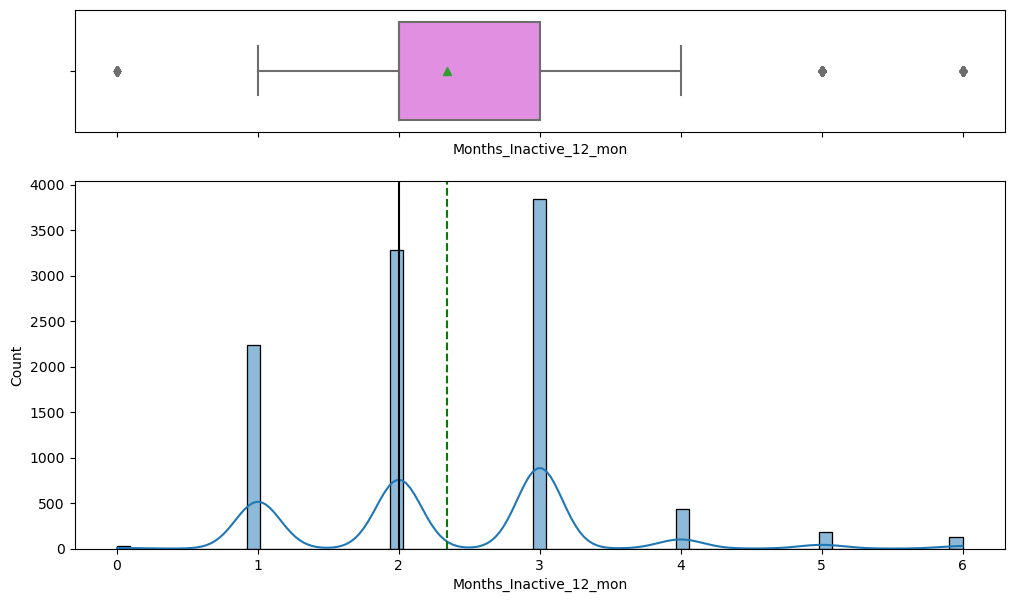

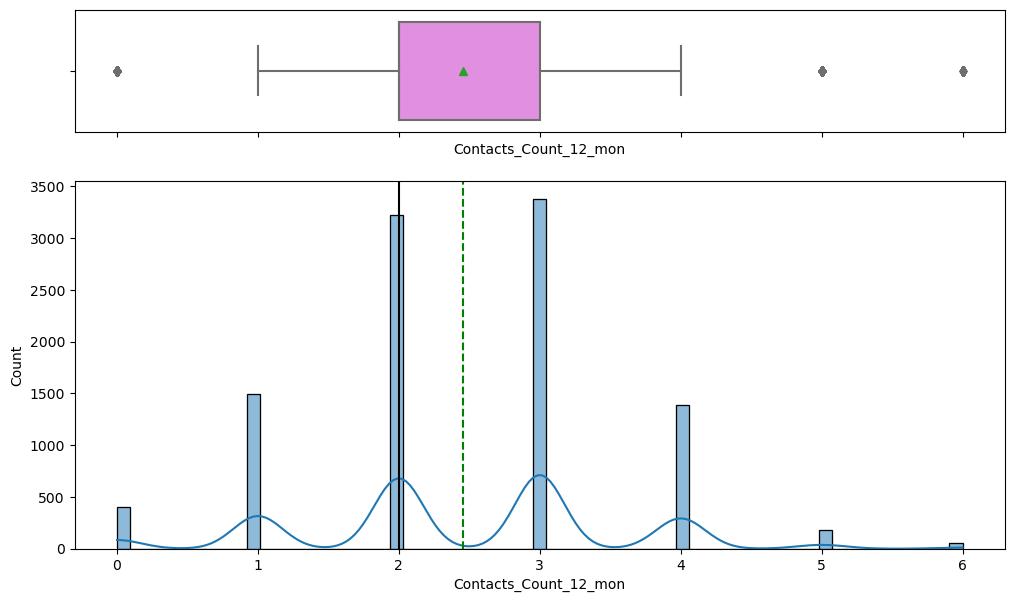

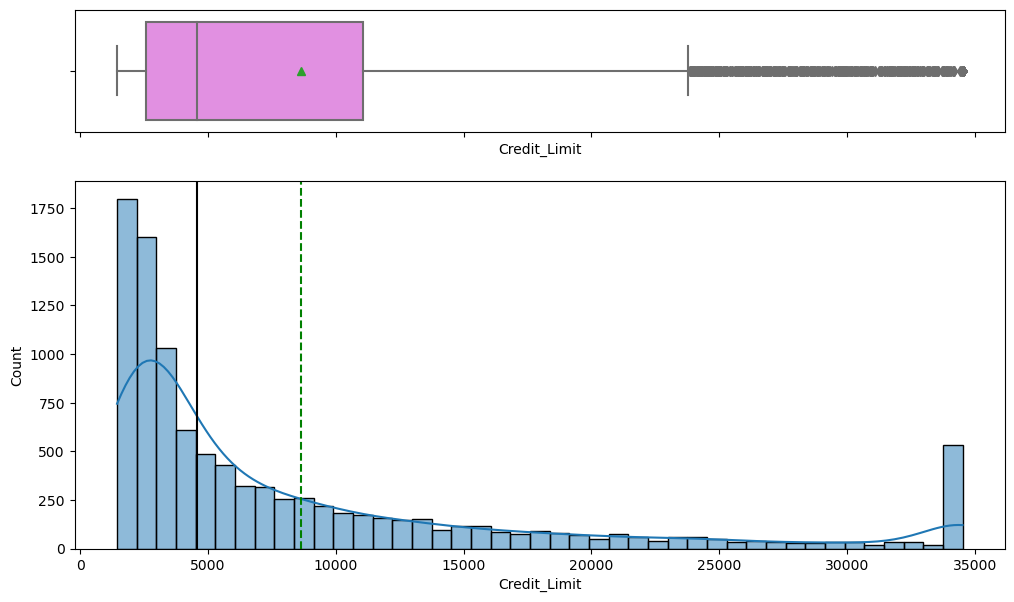

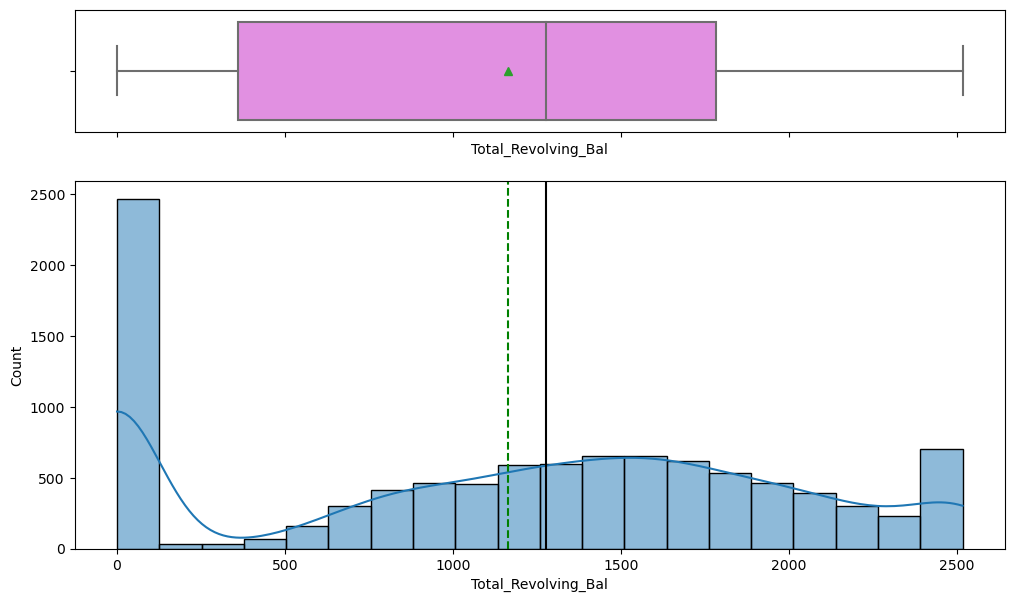

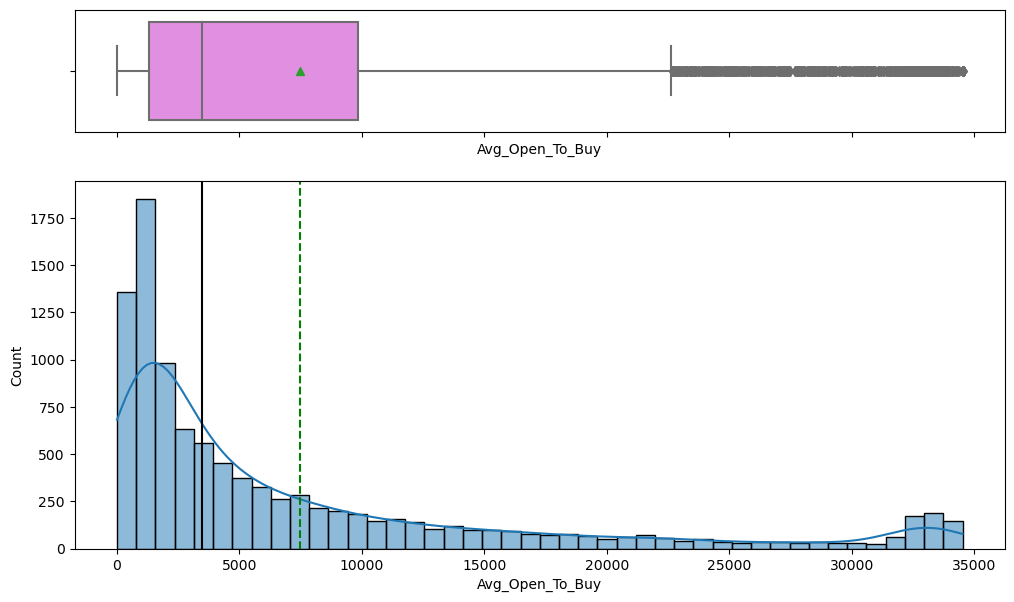

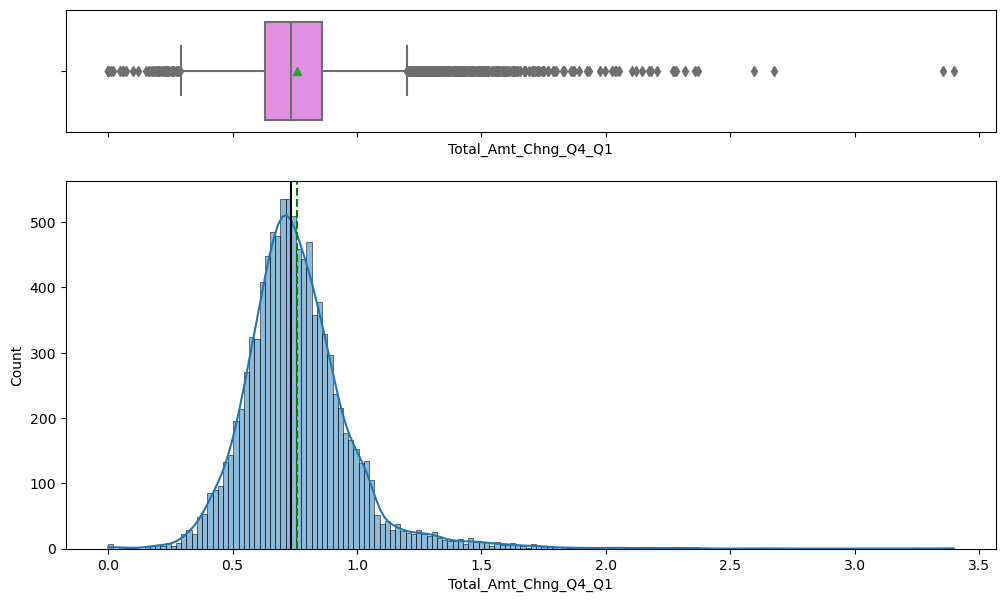

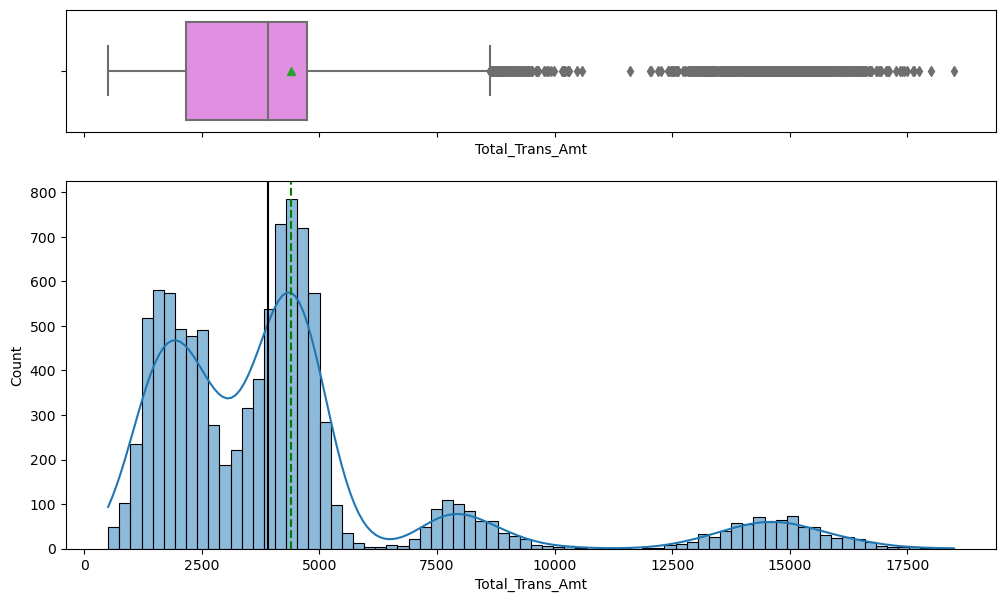

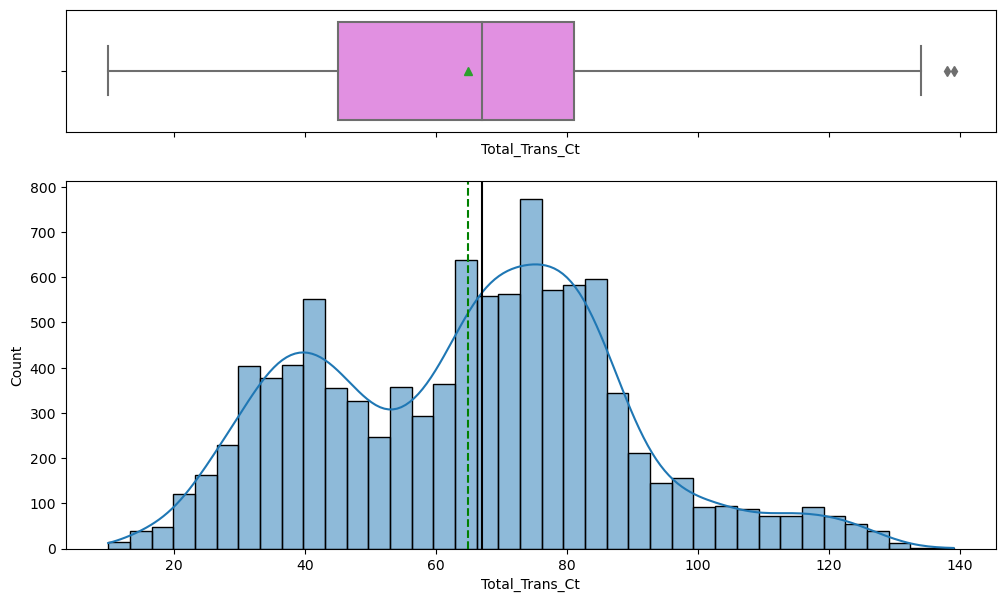

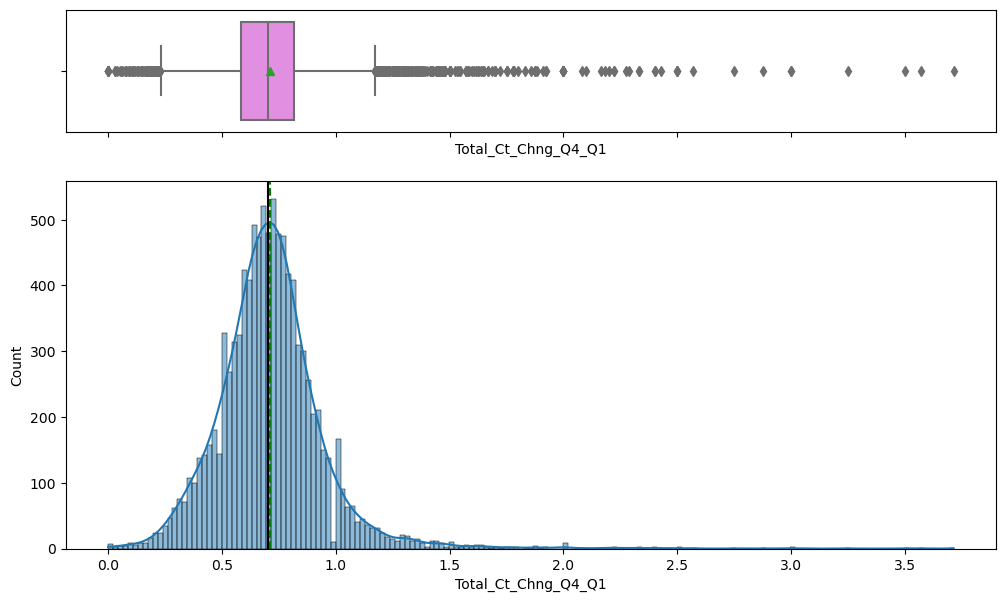

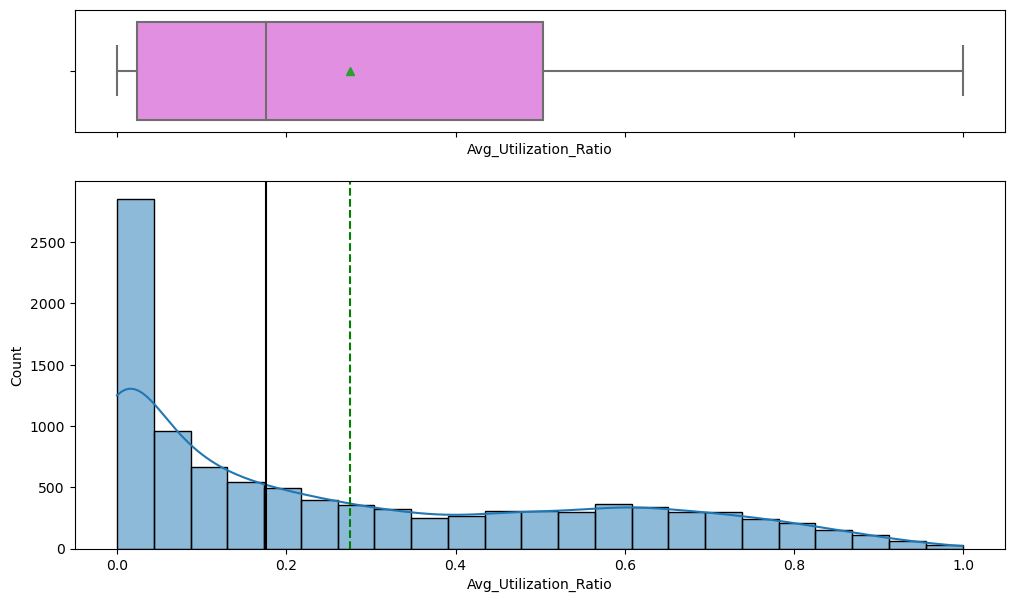

In [21]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        histogram_boxplot(df, column, figsize=(12, 7), kde=True, bins=None )

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

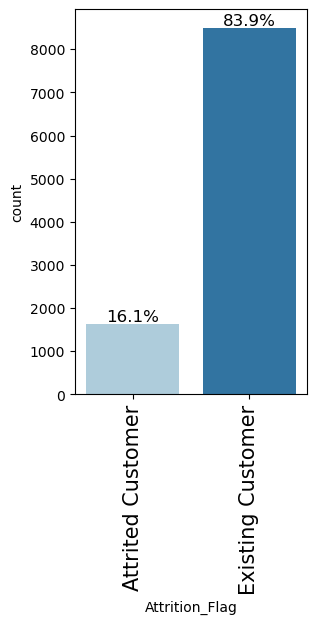

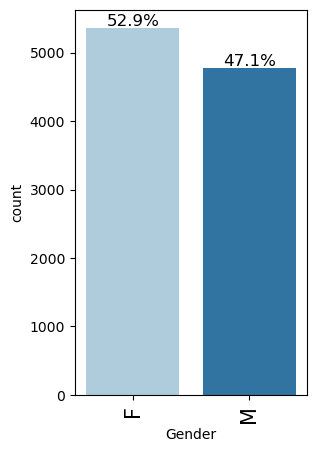

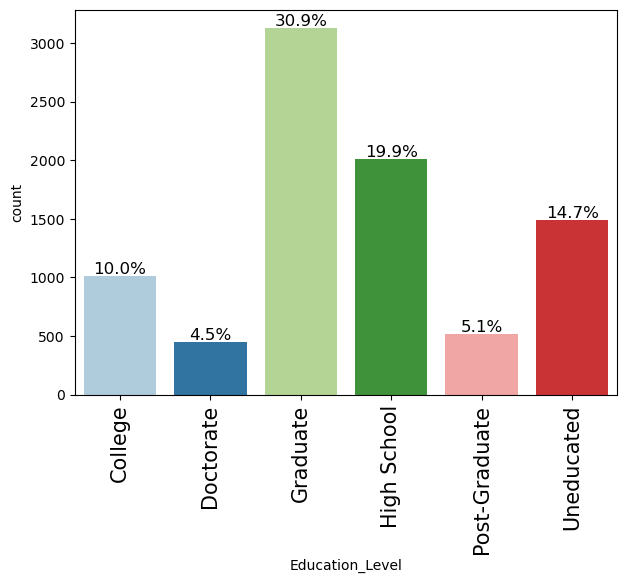

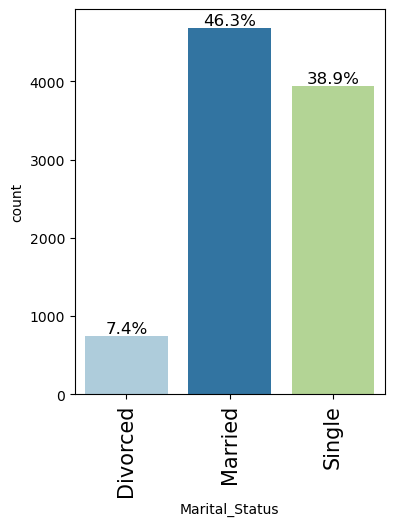

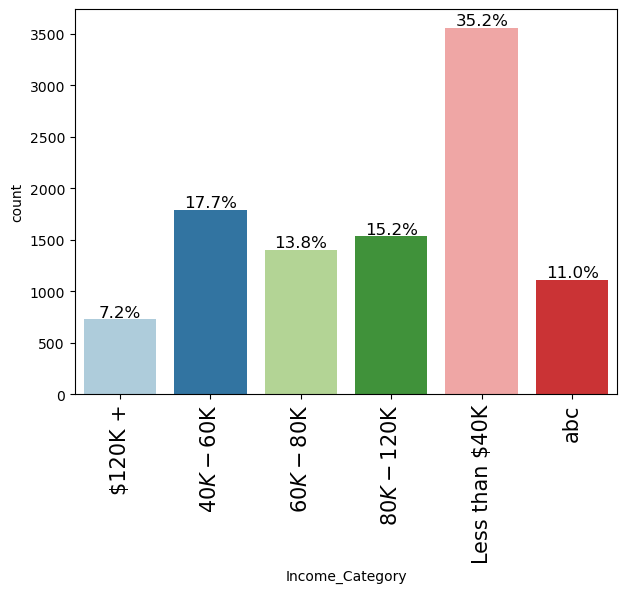

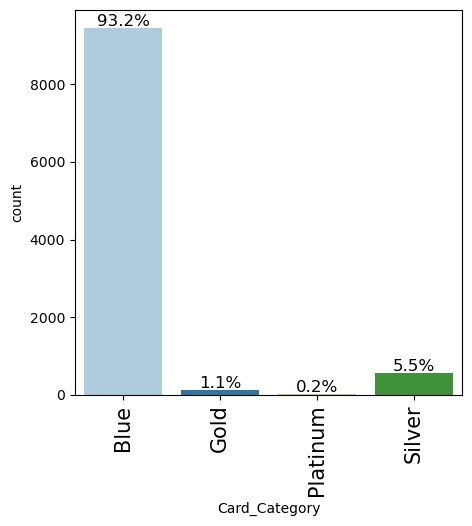

In [23]:
for column in df.columns:
    if df[column].dtype == 'category':
        labeled_barplot(df, column, True)

### <a name='biv'>Bivariate</a> <a href = #eda>eda</a>

In [24]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


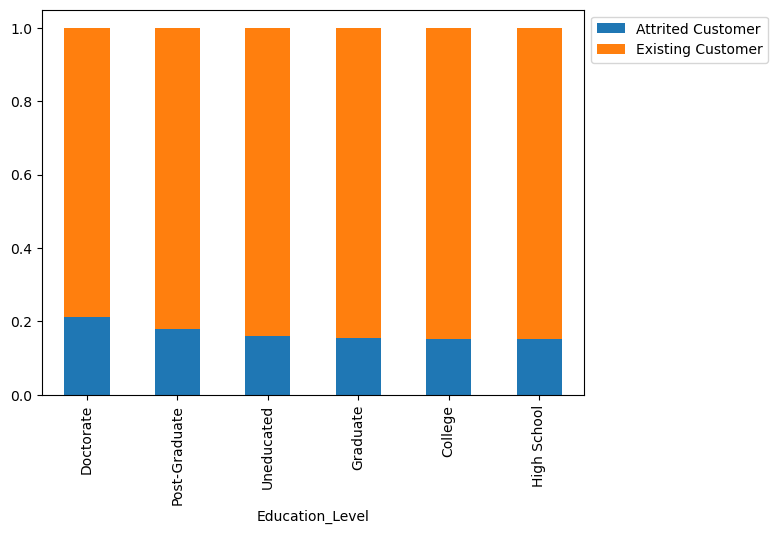

In [25]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


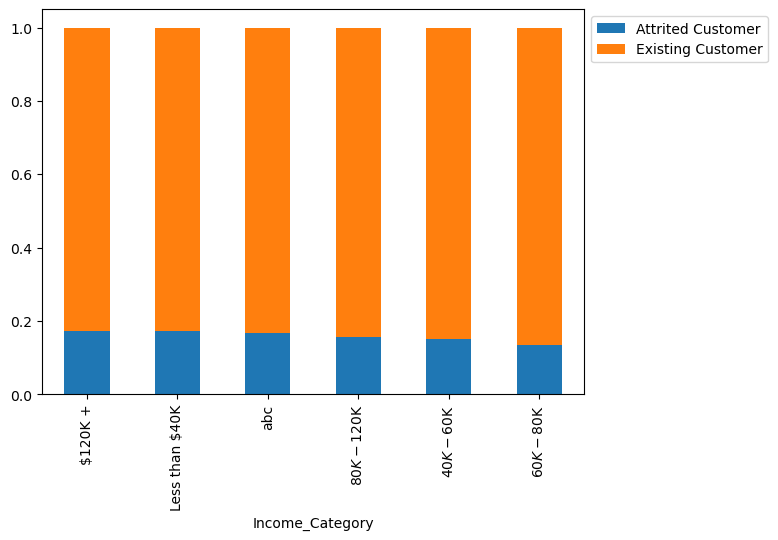

In [26]:
stacked_barplot(df, 'Income_Category', 'Attrition_Flag')

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


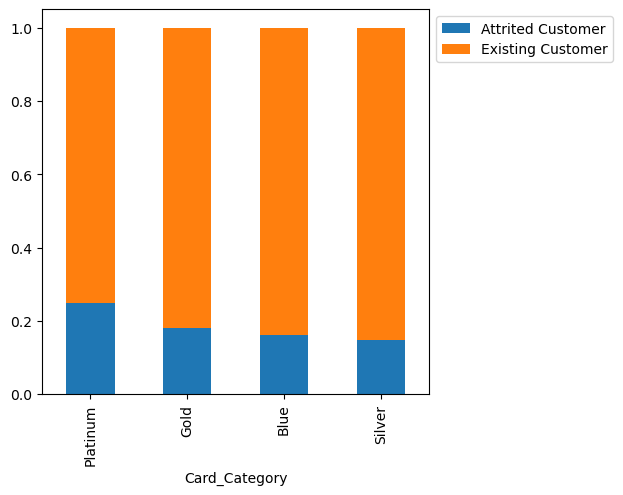

In [27]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag')

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Income_Category                                                             
All                 1013        451      3128         2013            516   
Less than $40K       345        158      1139          671            170   
$40K - $60K          183         70       553          355            111   
abc                  108         70       332          225             47   
$60K - $80K          132         59       422          307             77   
$80K - $120K         175         57       478          308             81   
$120K +               70         37       204          147             30   

Education_Level  Uneducated   All  
Income_Category                    
All                    1487  8608  
Less than $40K          522  3005  
$40K - $60K             249  1521  
abc                     185   967  
$60K - $80K             195  1192  
$80K - $120K            217  1316  
$120K +           

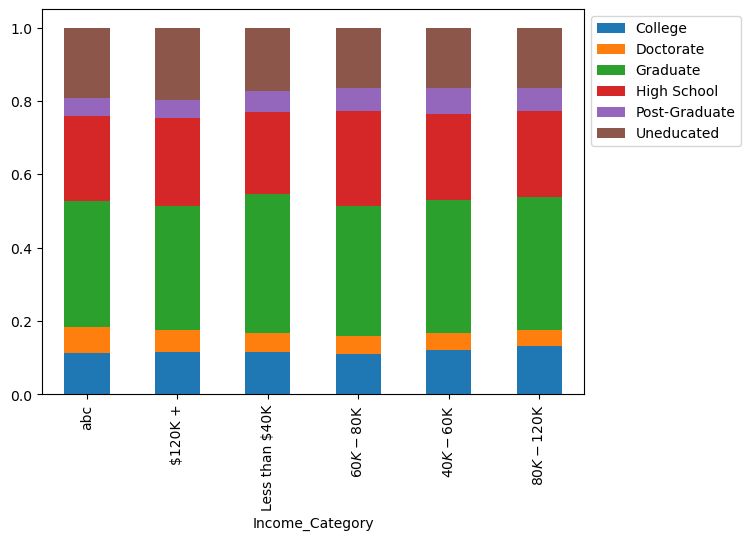

In [28]:
stacked_barplot(df, 'Income_Category', 'Education_Level')

In [29]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

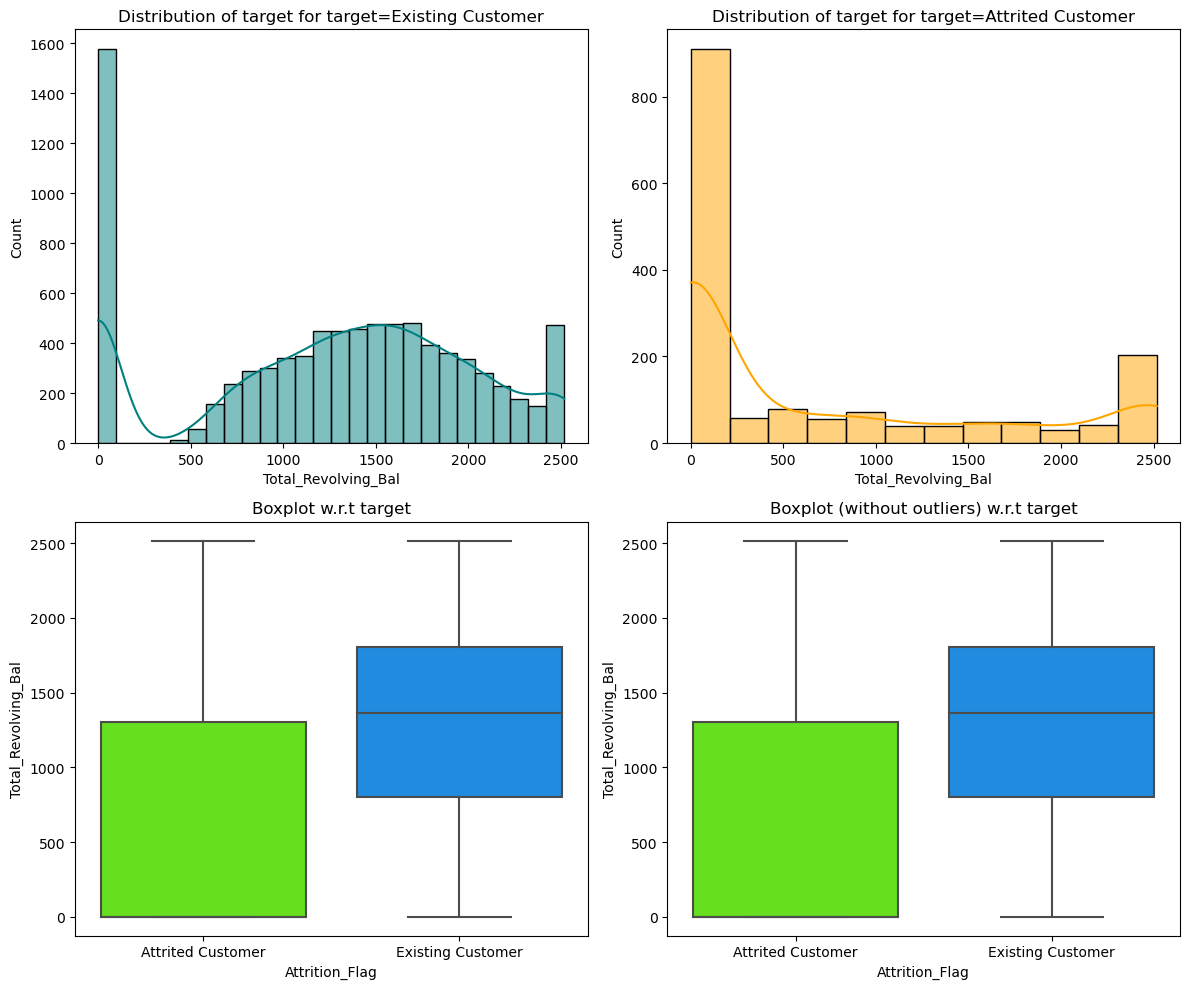

In [30]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

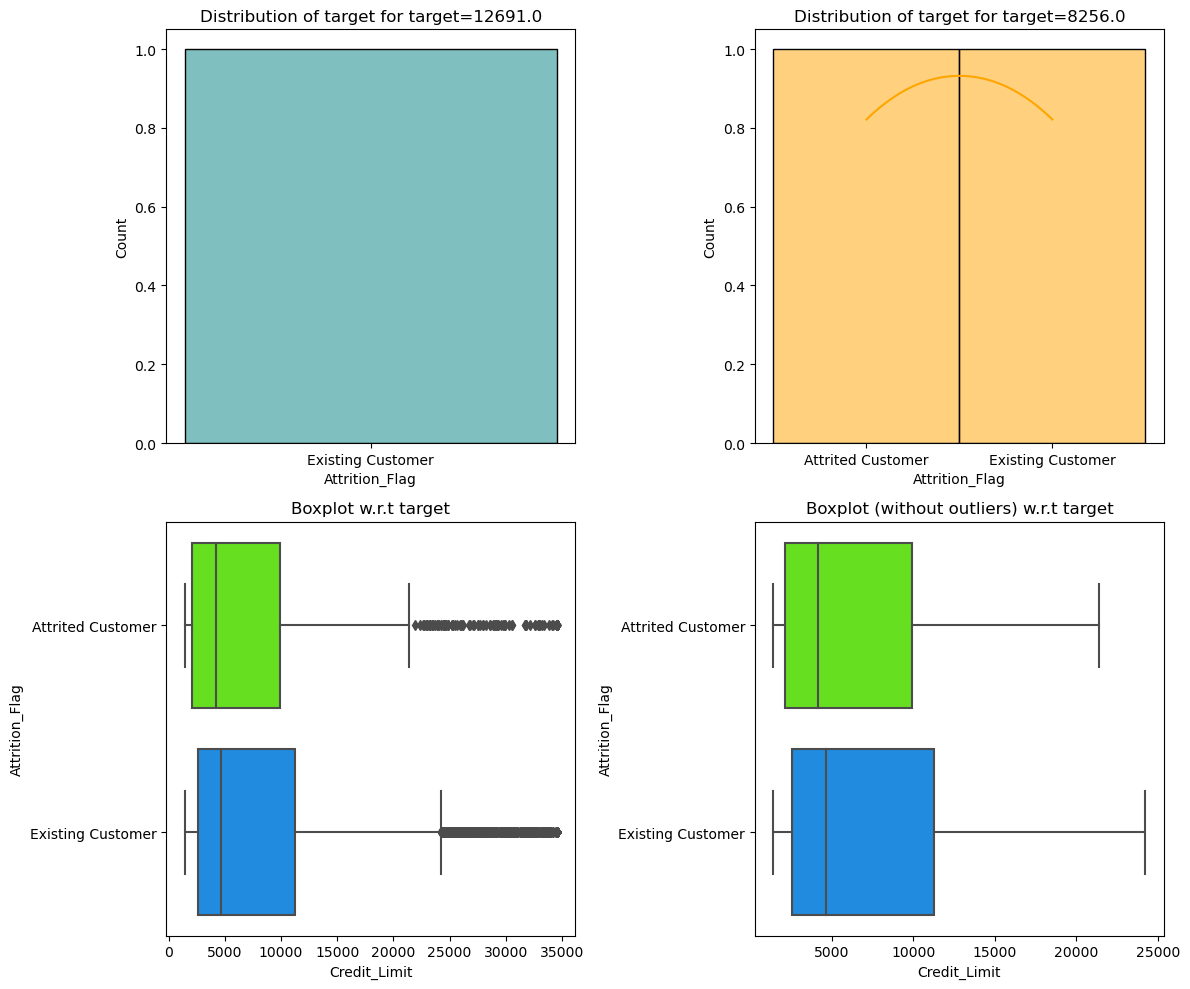

In [31]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Credit_Limit")

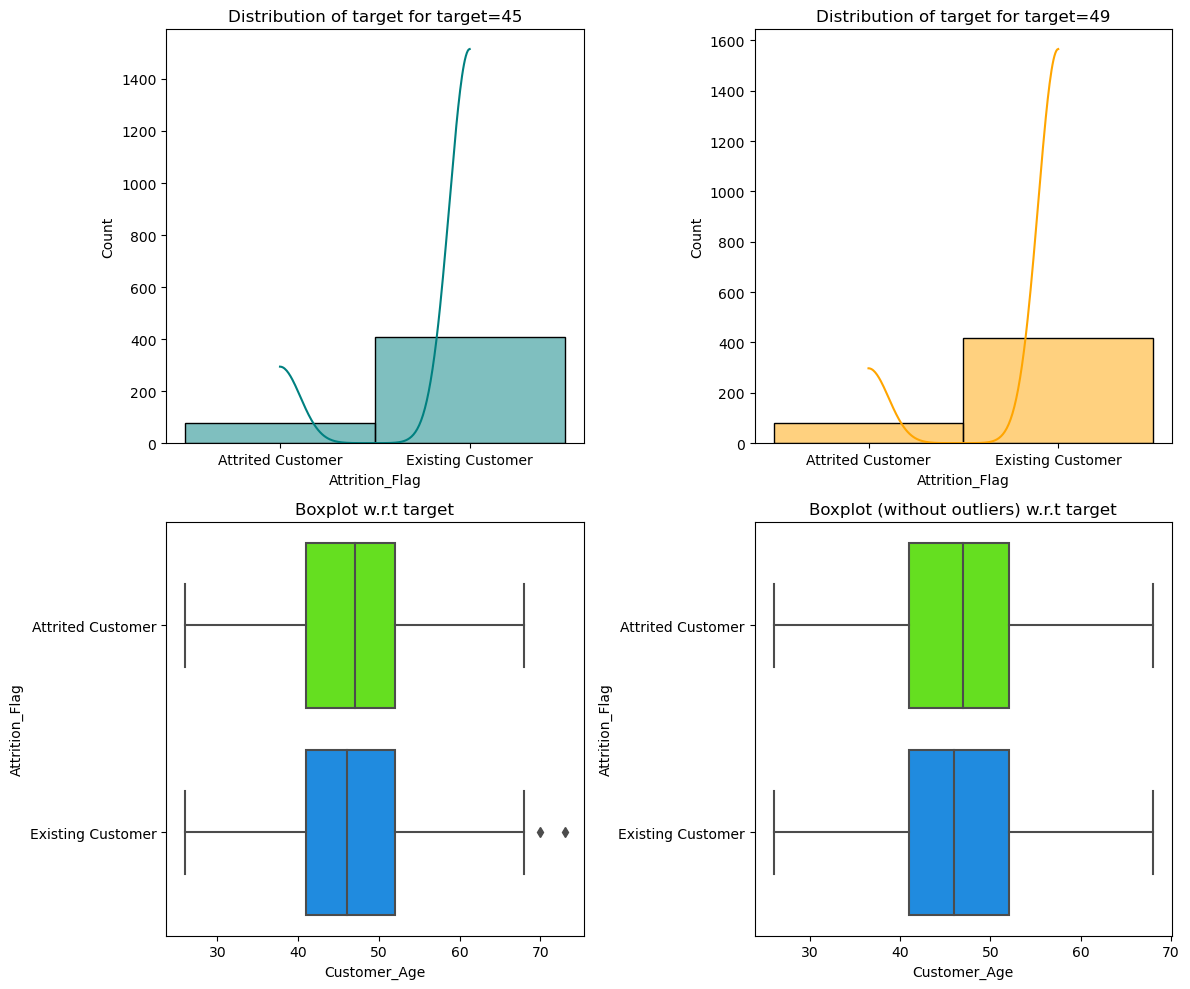

In [32]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Customer_Age")

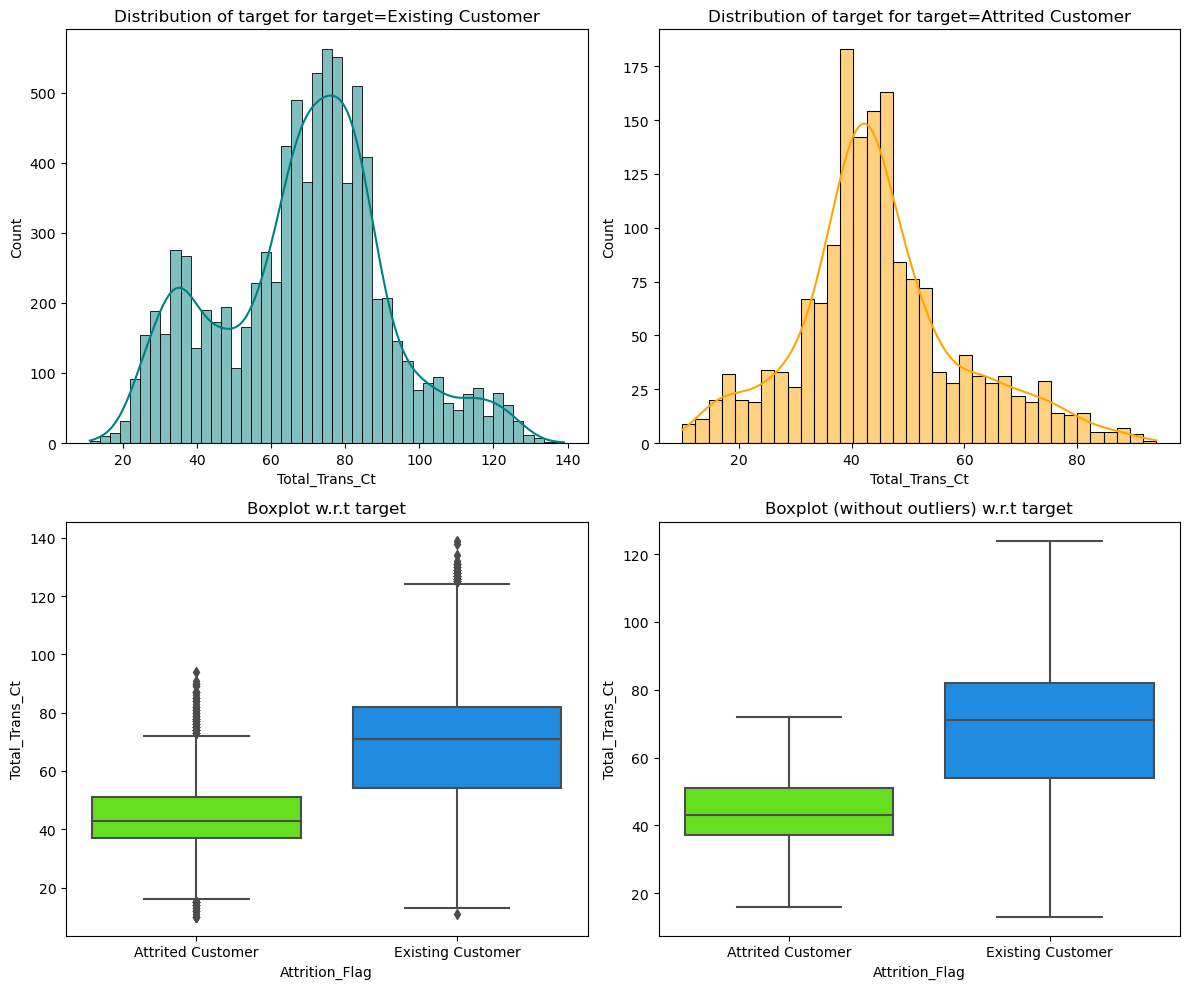

In [33]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

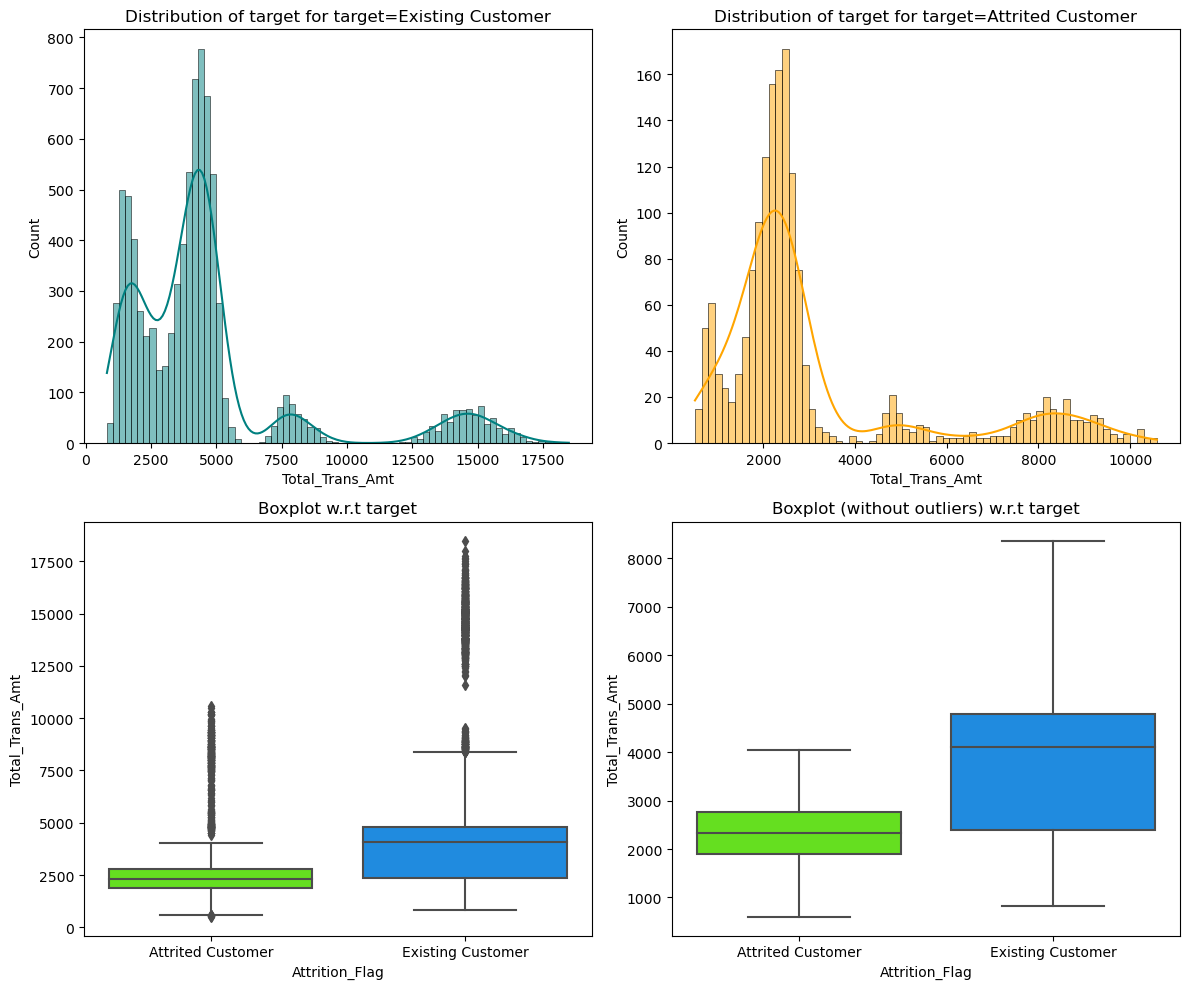

In [34]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

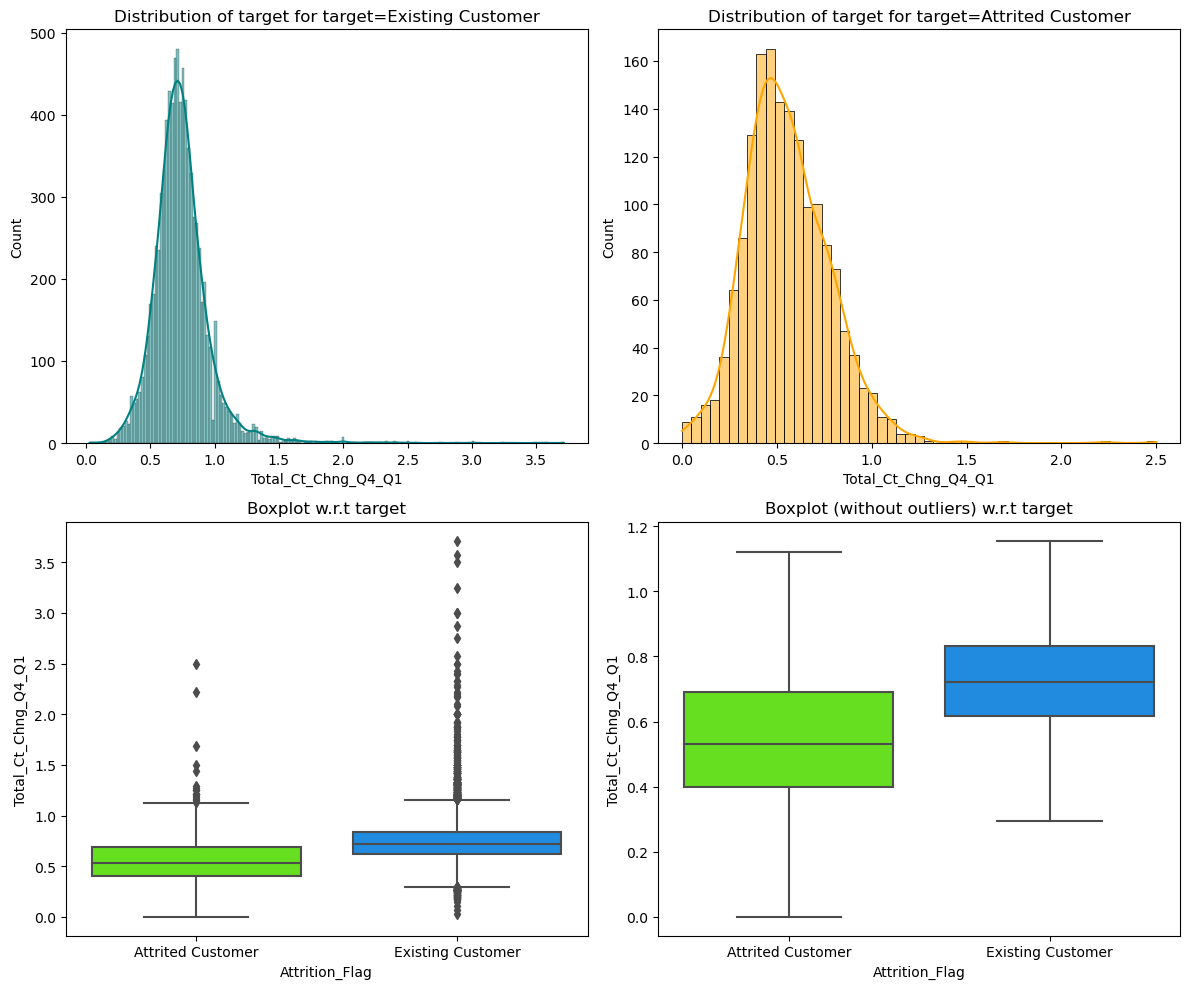

In [35]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

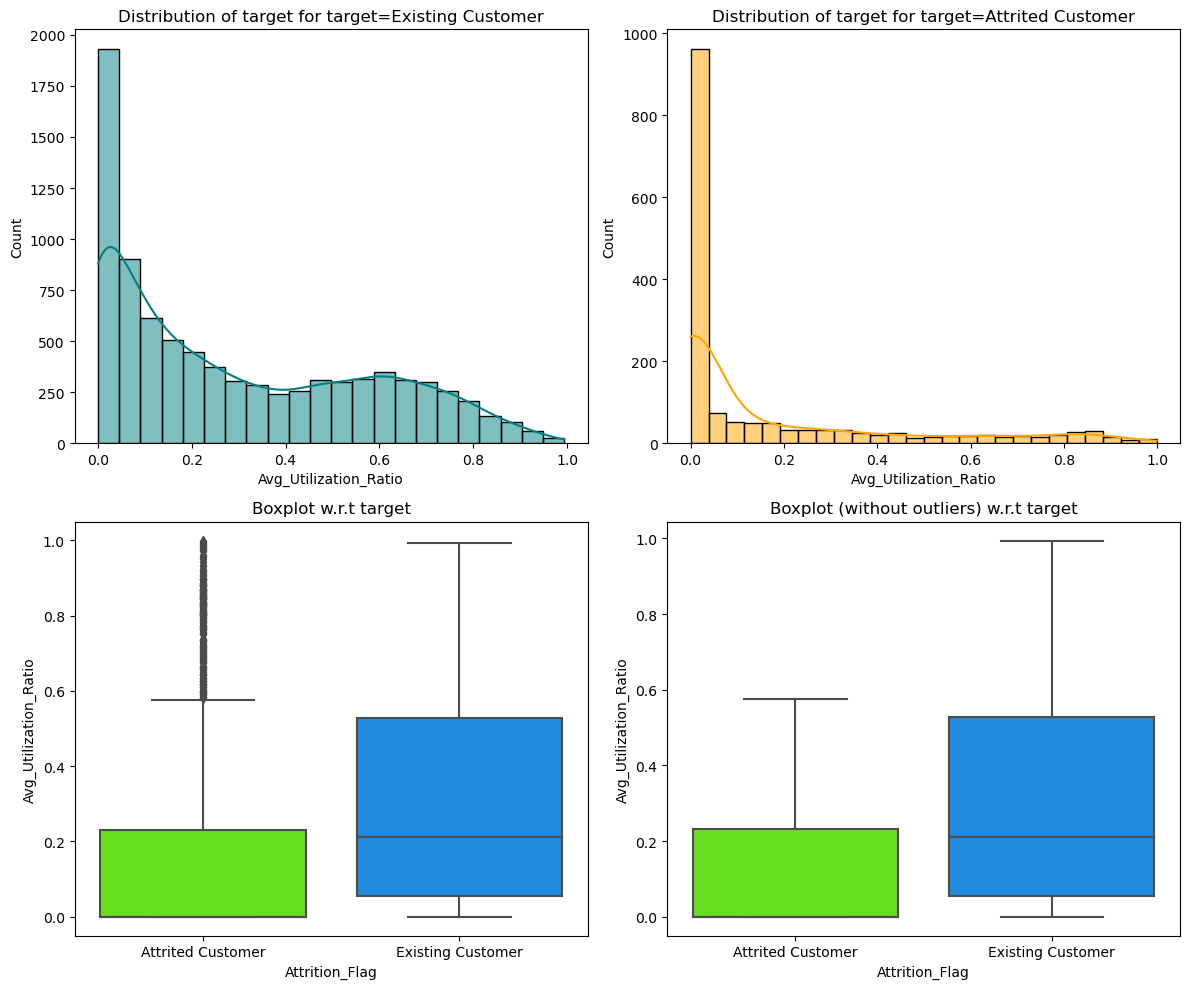

In [36]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

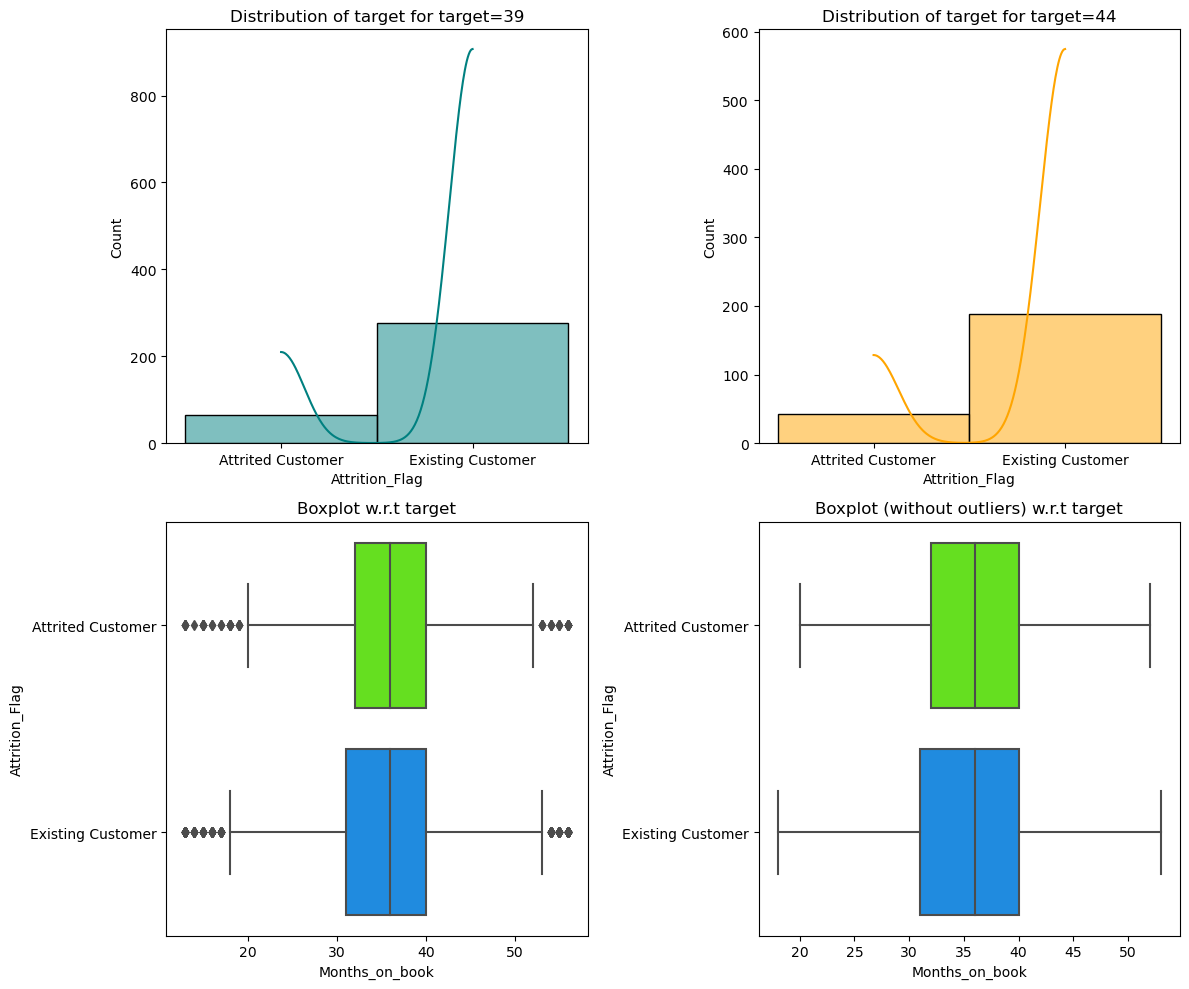

In [37]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Months_on_book")

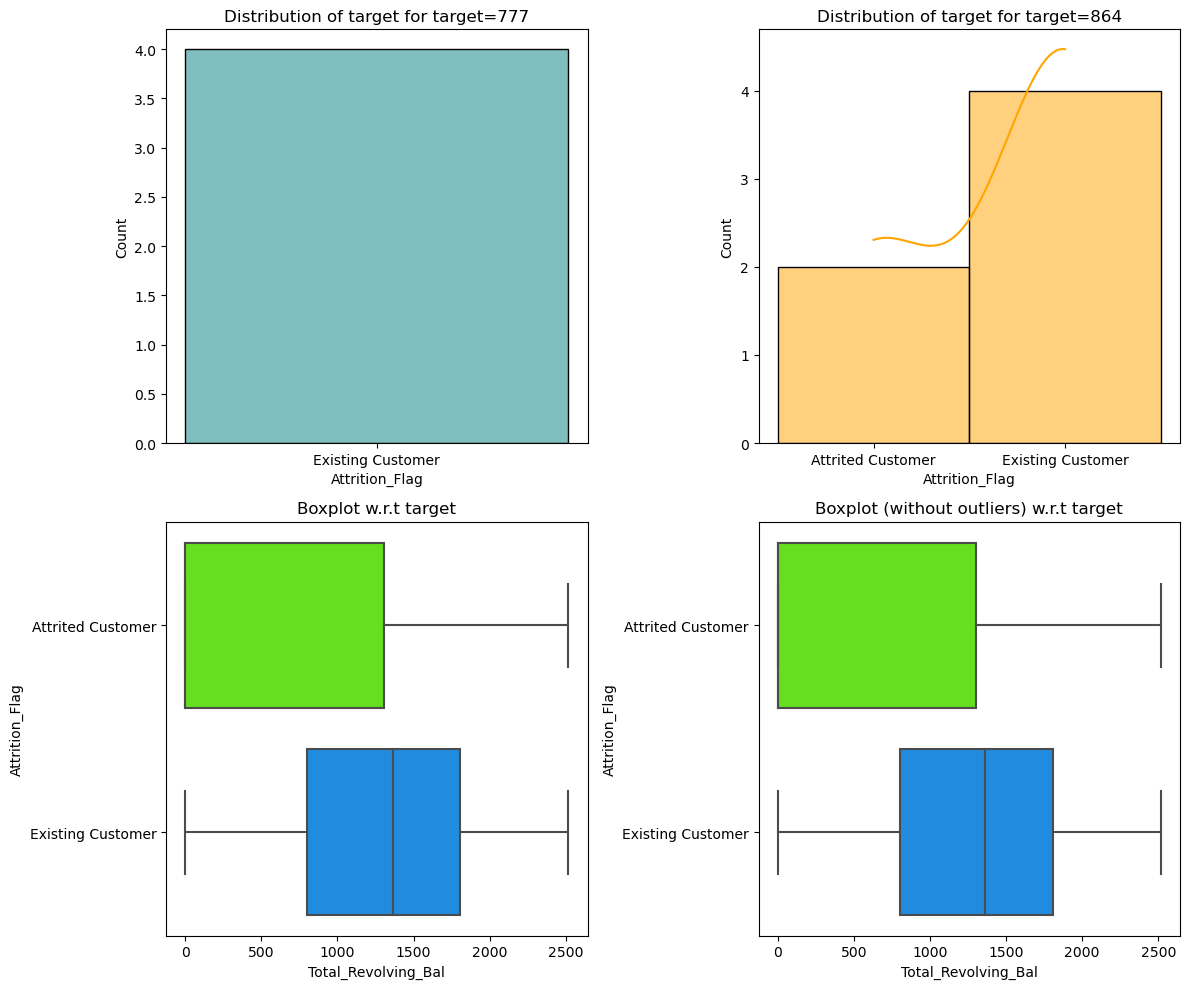

In [38]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Total_Revolving_Bal")

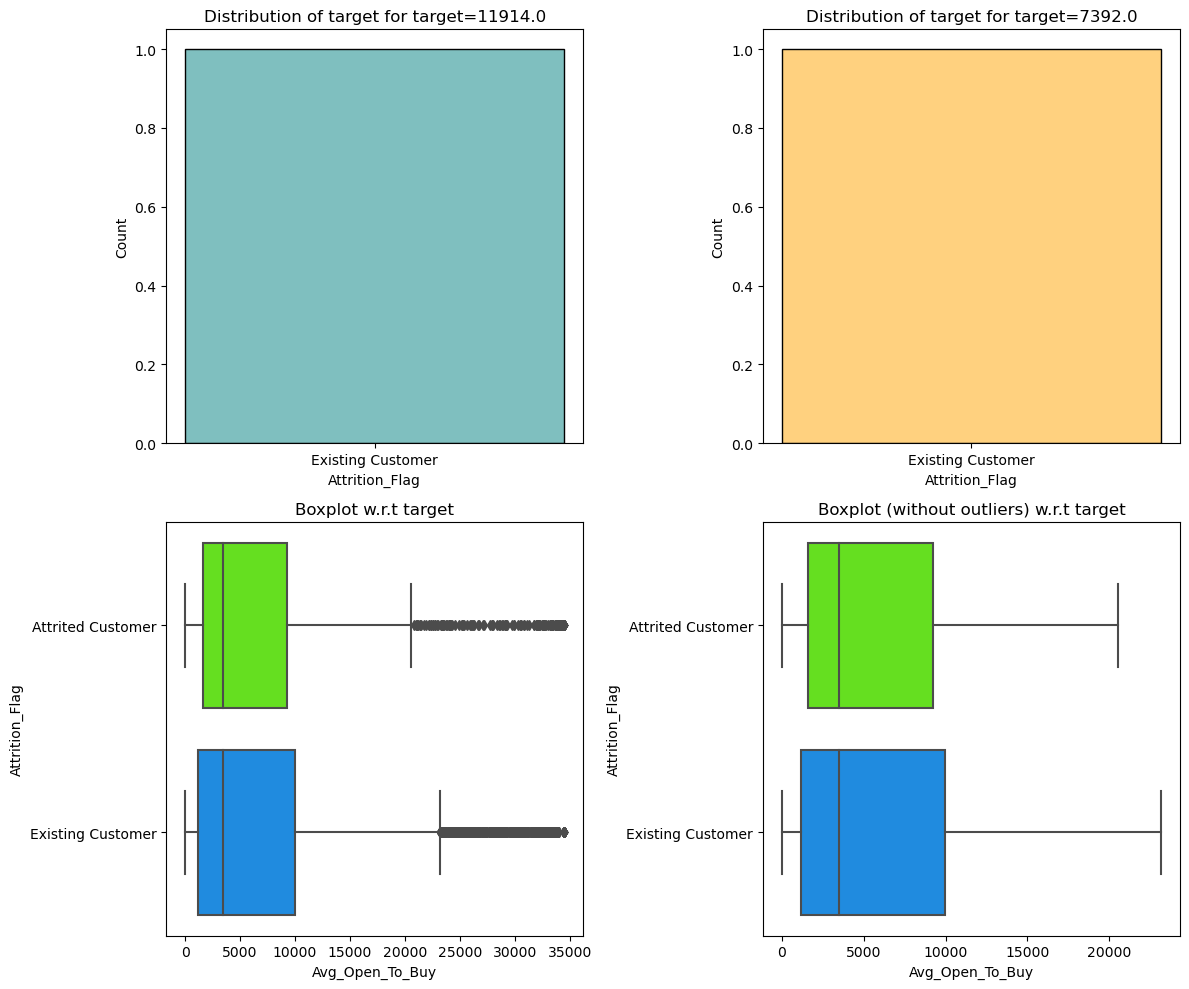

In [39]:
distribution_plot_wrt_target(df, "Attrition_Flag", "Avg_Open_To_Buy")

### <a name='mul'>Multivariate</a> <a href = #eda>eda</a>

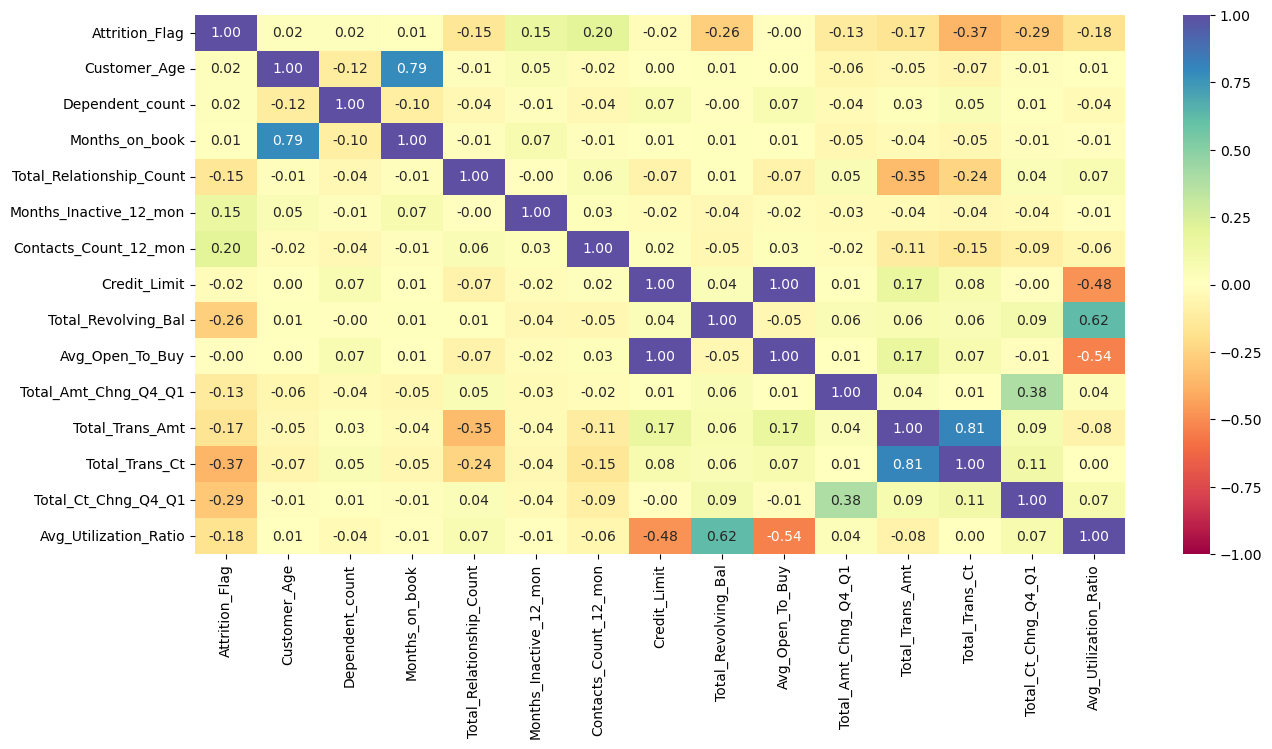

In [40]:
m_df = df.copy()

## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
m_df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
m_df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

# Convert object columns to int64 dtype, should be  ok as its binary
m_df["Attrition_Flag"] = m_df["Attrition_Flag"].astype('int64')

plt.figure(figsize=(15, 7))
numeric_df = m_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

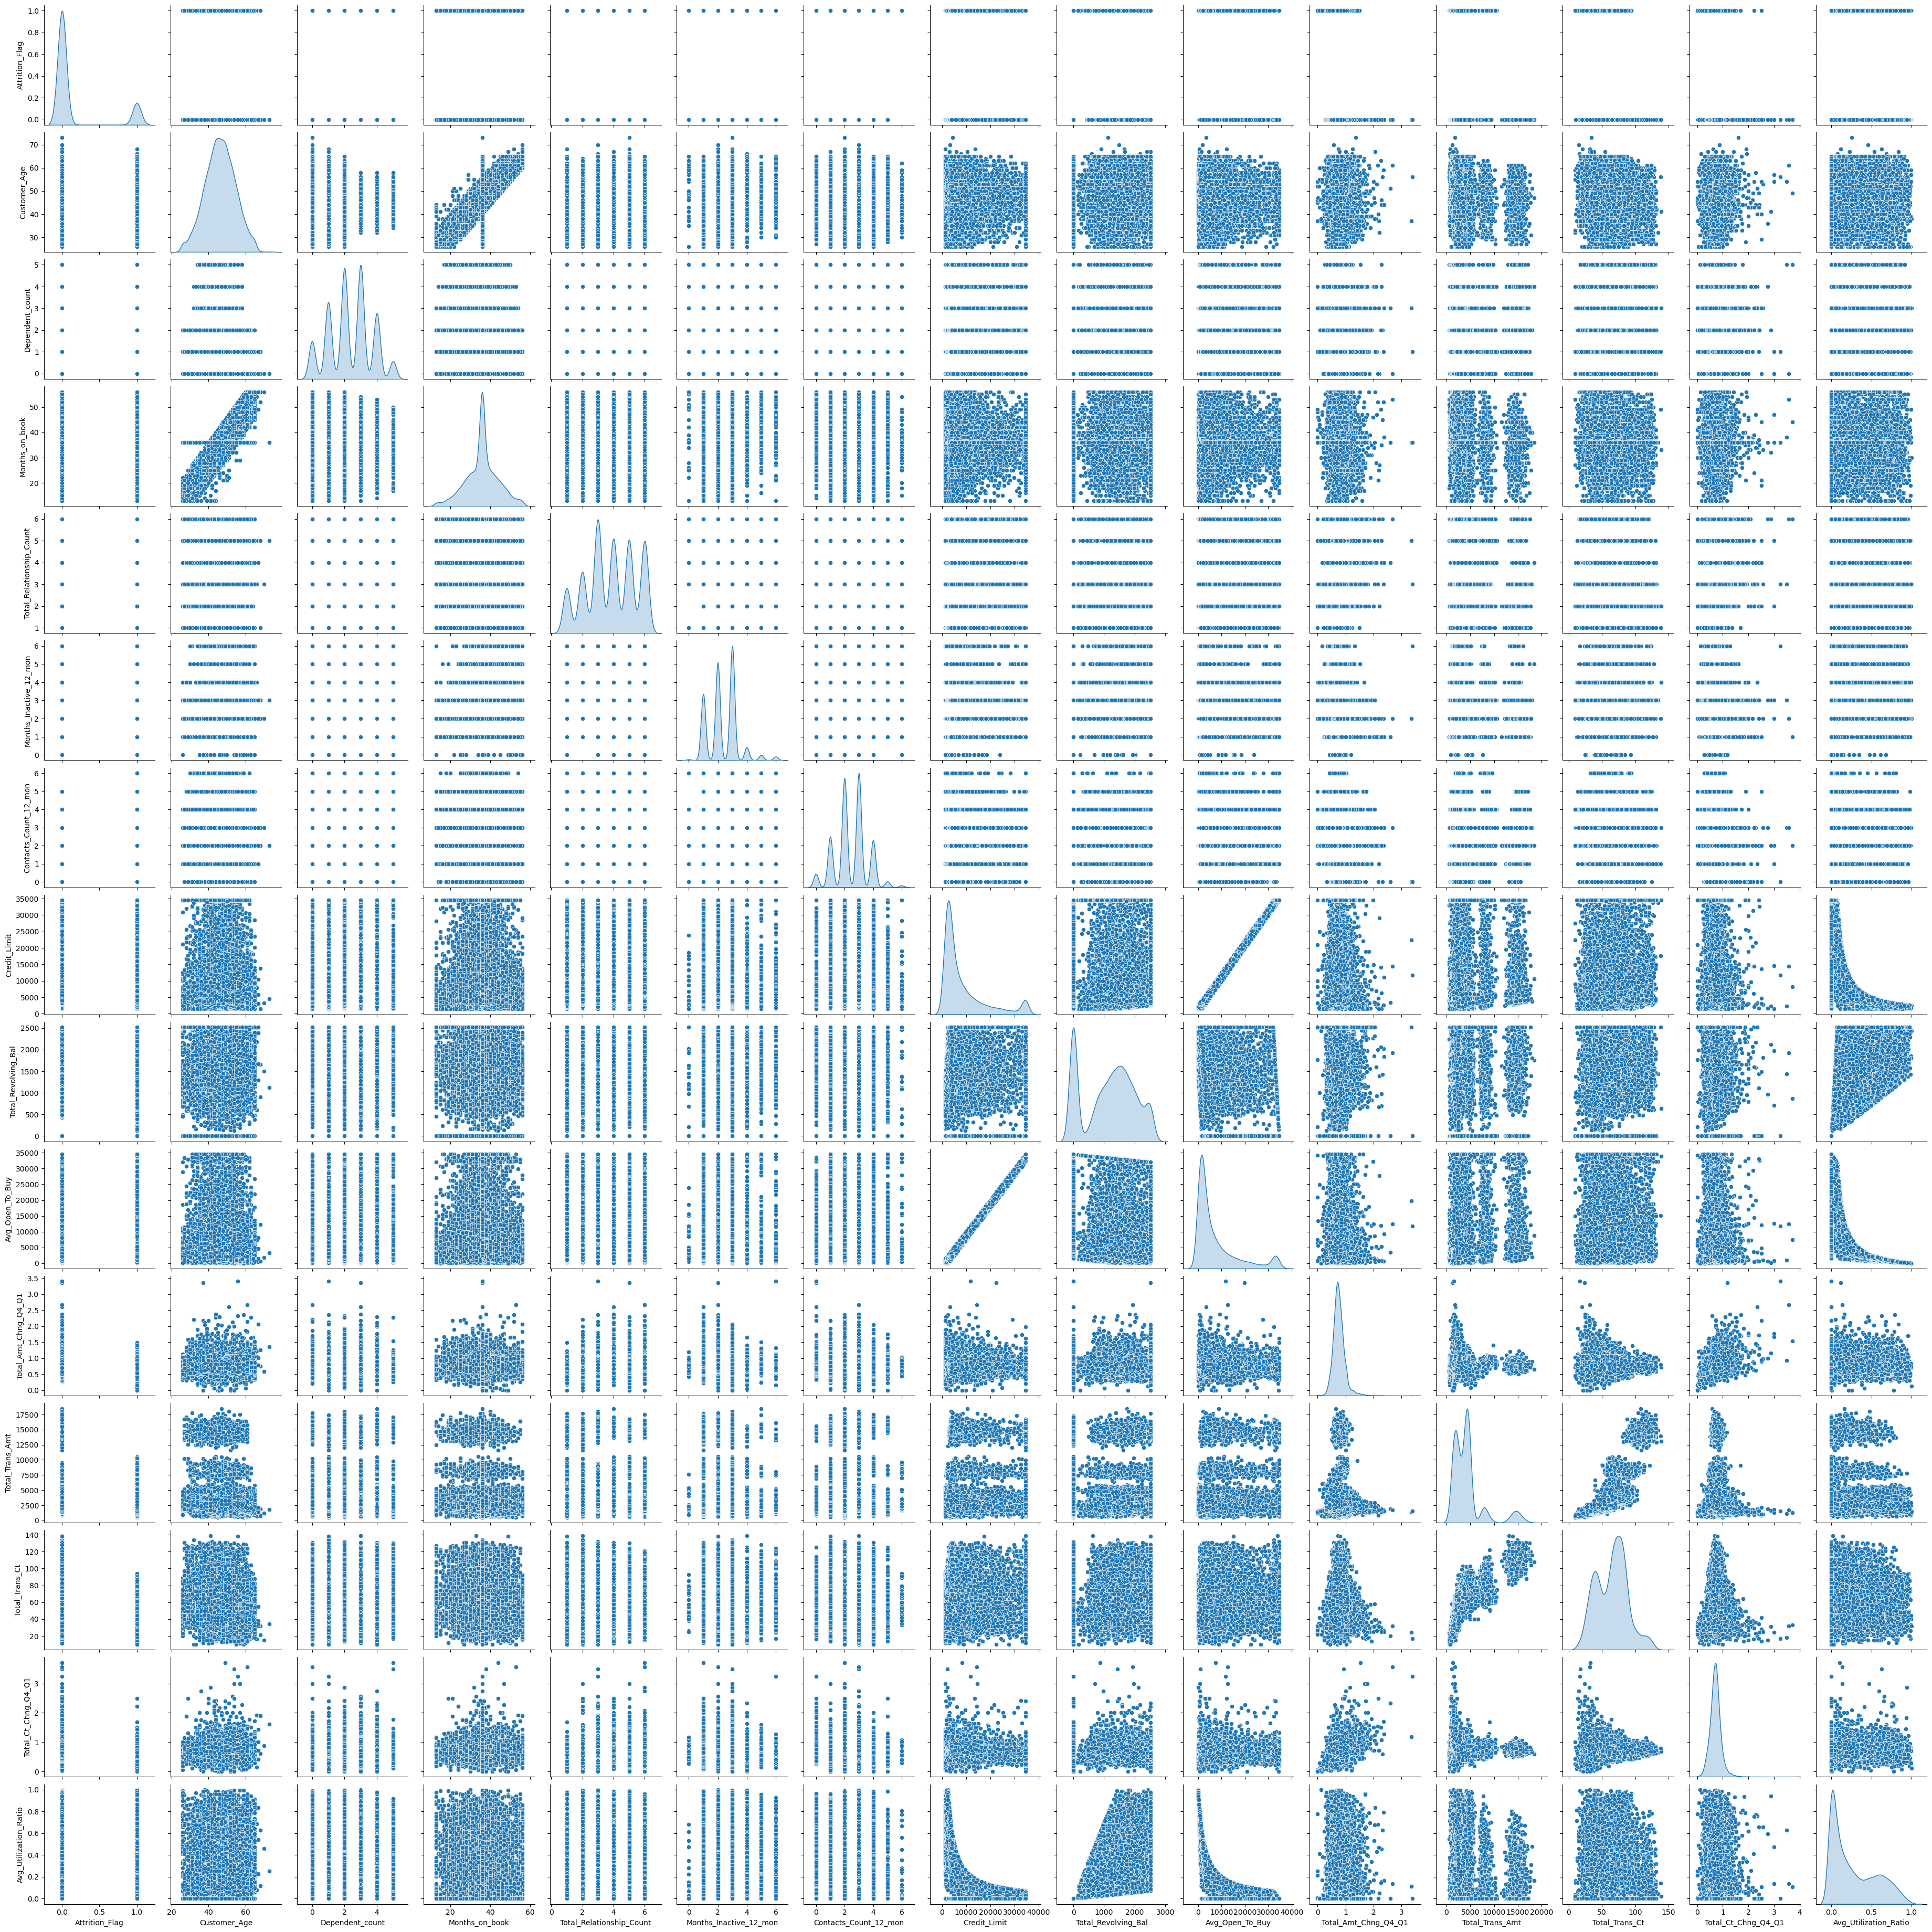

In [41]:
sns.pairplot(data=m_df, diag_kind="kde")
plt.show()

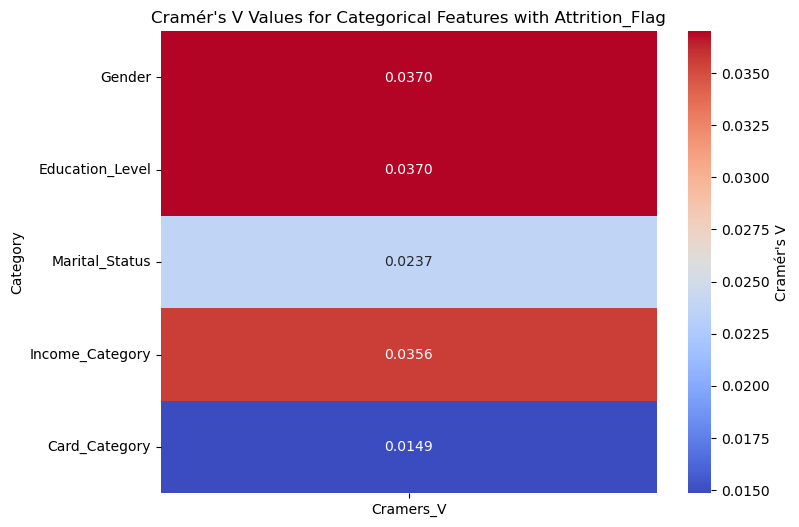

In [42]:
from scipy.stats import chi2_contingency

# Specify the target column
target_column = 'Attrition_Flag'

# Initialize the dictionary to store Cramér's V values
cramers_v_values = {}

# Calculate Cramér's V for each categorical feature with the target
for column in df.select_dtypes(include='category').columns:
    if column != target_column:
        contingency_table = pd.crosstab(df[column], df[target_column])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v_corr = (chi2 / n) ** 0.5
        cramers_v_values[column] = cramers_v_corr

# Create a DataFrame from the Cramér's V values
cramers_v_df = pd.DataFrame(list(cramers_v_values.items()), columns=['Category', 'Cramers_V'])
cramers_v_df.set_index('Category', inplace=True)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap="coolwarm", fmt=".4f", cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Values for Categorical Features with Attrition_Flag")
plt.show()

#### Observation

All the categorical variables have a weak association with Attrition_Flag

Doesn't really make sense to drop 'abc' Income_Category as it wouldn't have much of an affect in predicting the target

## <a name='pre'>Data Pre-processing</a> <a href = #toc>toc</a>

In [43]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

## <a name='imp'>Missing value imputation</a> <a href = #toc>toc</a>

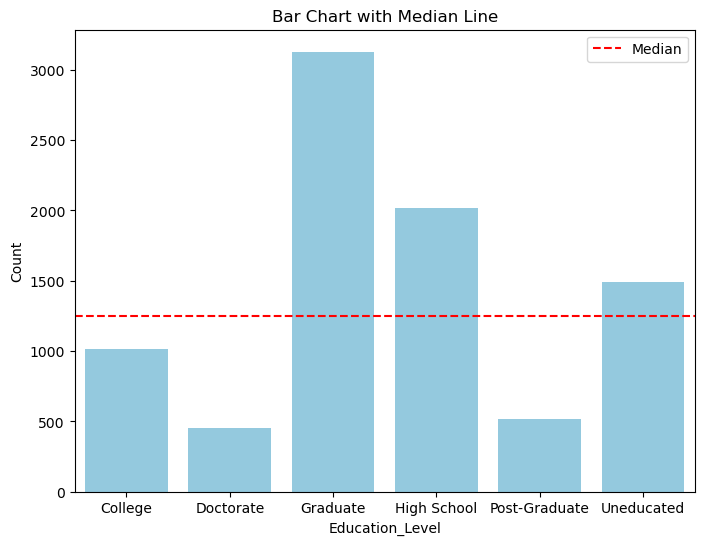

In [44]:
# Use seaborn to plot the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education_Level', color='skyblue')

# Calculate and plot the median line
median_value = df['Education_Level'].value_counts().median()
plt.axhline(y=median_value, color='red', linestyle='--', label='Median')

plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.title('Bar Chart with Median Line')
plt.legend()  # Add legend to show the median line label
plt.show()


In [45]:
ed_values_to_choose_from = ['Uneducated', 'College']

# Single was the median value
df['Marital_Status'].fillna('Single', inplace=True)

# Since Uneducated and College were the nearest neighbors to the median, randomly picked between the two
df['Education_Level'].fillna(value=np.random.choice(ed_values_to_choose_from), inplace=True)

df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [46]:
def get_outlier_percentage(dataframe, threshold=1.5):
    """
    Calculate the percentage of outliers for each numeric column in a DataFrame using IQR method.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame.
    - threshold (float): Outlier detection threshold (default is 1.5 times IQR).

    Returns:
    - pd.Series: A Series containing the percentage of outliers for each numeric column.
    """
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    outlier_percentages = {}

    for column in numeric_columns:
        # Calculate the first and third quartiles
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        iqr = q3 - q1

        # Define the upper and lower bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Count the number of outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
        outlier_percentage = len(outliers) / len(dataframe) * 100

        # Store the percentage of outliers for the column
        outlier_percentages[column] = outlier_percentage

    return pd.Series(outlier_percentages)

In [47]:
outlier_percentages = get_outlier_percentage(df)
print(outlier_percentages)

Customer_Age               0.01975
Dependent_count            0.00000
Months_on_book             3.81159
Total_Relationship_Count   0.00000
Months_Inactive_12_mon     3.26849
Contacts_Count_12_mon      6.21112
Credit_Limit               9.71660
Total_Revolving_Bal        0.00000
Avg_Open_To_Buy            9.50923
Total_Amt_Chng_Q4_Q1       3.91034
Total_Trans_Amt            8.84764
Total_Trans_Ct             0.01975
Total_Ct_Chng_Q4_Q1        3.89059
Avg_Utilization_Ratio      0.00000
dtype: float64


In [48]:
# Calculate the median for the selected columns, chose the two highest values
median_values = df[['Credit_Limit', 'Avg_Open_To_Buy']].median()

# Define a function to replace outliers with the median for two specific columns
def replace_outliers_with_median(row):
    # Set a threshold for identifying outliers (you can adjust this threshold based on your data)
    outlier_threshold = 1.5  # Example threshold
    
    # Iterate over the selected columns and check if the value is an outlier
    for col in ['Credit_Limit', 'Avg_Open_To_Buy']:
        if abs(row[col] - median_values[col]) > outlier_threshold * df[col].std():
            row[col] = median_values[col]
    return row

# Apply the function to replace outliers with the median for two specific columns
df = df.apply(replace_outliers_with_median, axis=1)

In [49]:
outlier_percentages = get_outlier_percentage(df)
print(outlier_percentages)

Customer_Age               0.01975
Dependent_count            0.00000
Months_on_book             3.81159
Total_Relationship_Count   0.00000
Months_Inactive_12_mon     3.26849
Contacts_Count_12_mon      6.21112
Credit_Limit               8.01817
Total_Revolving_Bal        0.00000
Avg_Open_To_Buy            7.67256
Total_Amt_Chng_Q4_Q1       3.91034
Total_Trans_Amt            8.84764
Total_Trans_Ct             0.01975
Total_Ct_Chng_Q4_Q1        3.89059
Avg_Utilization_Ratio      0.00000
dtype: float64


## <a name='mod'>Model Building (mod)</a> <a href = #toc>toc</a>

1. <a href = #ori>Model Building with original data</a>
2. <a href = #ovr>Model Building with Oversampled data</a>
3. <a href = #und>Model Building with Undersampled data</a>
4. <a href = #hyp>HyperparameterTuning</a>

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### <a name='ori'>Model Building with original data</a> <a href = #mod>mod</a>

Sample code for model building with original data

In [51]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Attrition_Flag', axis=1).copy()

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True,
)

y = df[['Attrition_Flag']]

#shuffling to avoid leakage
X, y = shuffle(X, y, random_state=1)

# Split the dataset into a temporary set and a test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Split the temporary set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

In [52]:
train_count = X_train.shape[0]
val_count = X_val.shape[0]
test_count = X_test.shape[0]

print(f'Train Count: {train_count}')
print(f'Validation Count: {val_count}')
print(f'Test Count: {test_count}')

Train Count: 6075
Validation Count: 2026
Test Count: 2026


In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=50, random_state=1, n_jobs=-1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, n_estimators=50, n_jobs=-1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1, n_estimators=50)))
models.append(("XGBClassifier", XGBClassifier(random_state=1, n_estimators=50, n_jobs=-1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1, n_estimators=50)))

base_scores = []

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train_encoded)
    scores = recall_score(y_train_encoded, model.predict(X_train))
    print("{}: {}".format(name, scores))
    base_scores.append((name, round(scores, 4)))
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    scores_val = recall_score(y_val_encoded, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9996092986911506
Random forest: 0.9998046493455753
GradientBoostingClassifier: 0.9917952725141629
XGBClassifier: 0.9998046493455753
AdaBoostClassifier: 0.9835905450283259

Validation Performance:

Bagging: 0.9778972520908005
Random forest: 0.9814814814814815
GradientBoostingClassifier: 0.9850657108721624
XGBClassifier: 0.98805256869773
AdaBoostClassifier: 0.9802867383512545


### Observation

The inital models that seem to stand out without over/underfitting are Bagging, GradientBoostingClassifier, XGBClassifier and AdaBoostClassifier

### <a name='ovr'>Model Building with Oversampled data</a>  <a href = #mod>mod</a>

In [54]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
y_train_over_encoded = label_encoder.fit_transform(y_train_over)

In [55]:
# save over scores

over_scores = []

print("\n" "Over-Sampling Performance:" "\n")
for name, model in models:
    scores = recall_score(y_train_over_encoded, model.predict(X_train_over))
    print("{}: {}".format(name, scores))
    over_scores.append((name, round(scores, 4)))


Over-Sampling Performance:

Bagging: 0.9996092986911506
Random forest: 0.9998046493455753
GradientBoostingClassifier: 0.9917952725141629
XGBClassifier: 0.9998046493455753
AdaBoostClassifier: 0.9835905450283259


### <a name='und'>Model Building with Undersampled data</a>  <a href = #mod>mod</a>

In [56]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
y_train_un_encoded = label_encoder.fit_transform(y_train_un)

In [57]:
# save under models

under_scores = []

print("\n" "Under-Sampling Train Performance:" "\n")
for name, model in models:
    scores = recall_score(y_train_un_encoded, model.predict(X_train_un))
    print("{}: {}".format(name, scores))
    under_scores.append((name, round(scores, 4)))


Under-Sampling Train Performance:

Bagging: 1.0
Random forest: 1.0
GradientBoostingClassifier: 0.9947698744769874
XGBClassifier: 1.0
AdaBoostClassifier: 0.9864016736401674


### Observation

Don't think Underfitting makes sense in the context of this use case, as the undersampled Category in Attrition_Flag is also what is trying to be maximized.

In [58]:
def format_hdr(text, max_length):
    return text + ' ' * (max_length - len(text)) 

def print_scores(base, over, under):
    for index, base_tuple in enumerate(base):
        over_tuple = over[index]
        under_tuple = under[index]
        print(f'{format_hdr(base_tuple[0], 26)}:\t{base_tuple[1]}\t{over_tuple[1]}\t{under_tuple[1]}')

print(f"{format_hdr('', 26)}\tBase\tOver\tUnder")

print_scores(base_scores, over_scores, under_scores)

                          	Base	Over	Under
Bagging                   :	0.9996	0.9996	1.0
Random forest             :	0.9998	0.9998	1.0
GradientBoostingClassifier:	0.9918	0.9918	0.9948
XGBClassifier             :	0.9998	0.9998	1.0
AdaBoostClassifier        :	0.9836	0.9836	0.9864


### Observation

The two models perfroming best at this point without over/under fitting are GradientBoostingClassifier and AdaBoostClassifier 

### <a name='hyp'>HyperparameterTuning</a>  <a href = #mod>mod</a>

### Observation

Chose GradientBoostingClassifier, XGBClassifier and AdaBoostClassifier for Hyperparameter Tuning as they are models that benefit more. Also chose over sampled data as none of the models oversampling there and oversampling showed the best perfromance among the three types of models tried so far.

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [59]:
scorer = metrics.make_scorer(metrics.recall_score)

#### Tuning method for GradientBoostingClassifier with oversampled data

In [60]:
# defining model
Model = GradientBoostingClassifier(random_state=1, n_estimators=50)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,
                                                         randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=nan:


#### Tuning method for XGBClassifier with oversampled data

In [61]:
# defining model
Model = XGBClassifier(random_state=1, n_jobs=-1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over_encoded)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,
                                                         randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9894519794721408:


#### Tuning method for AdaBoostClassifier with oversampled data

In [62]:
# defining model
Model = AdaBoostClassifier(random_state=1, n_estimators=50)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,
                                                         randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=nan:


In [63]:
models = []  # Empty list to store all the models

hyper_scores = []

# Appending models into the list
models.append(("GradientBoostingClassifier_hyper_over", 
               GradientBoostingClassifier(subsample= 0.7, 
                                           n_estimators= 100, 
                                           max_features= 0.7, 
                                           learning_rate= 0.05, 
                                           init= DecisionTreeClassifier(random_state=1), 
                                           random_state=1)))
models.append(("XGBClassifier_hyper_over", XGBClassifier(subsample= 0.7, 
                                                         scale_pos_weight= 5, 
                                                         n_estimators= 100, 
                                                         learning_rate= 0.1, 
                                                         gamma= 3, 
                                                         random_state=1,
                                                         n_jobs=-1)))
models.append(("AdaBoostClassifier_hyper_over", 
               AdaBoostClassifier(n_estimators= 50, 
                                   learning_rate= 0.05, 
                                   base_estimator= DecisionTreeClassifier(max_depth=2, 
                                                                          random_state=1), 
                                   random_state=1)))

print("\n" "Hyperparameter Tuning Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over_encoded)
    scores = recall_score(y_train_over_encoded, model.predict(X_train_over))
    print("{}: {}".format(name, scores))
    hyper_scores.append((name, round(scores, 4)))


Hyperparameter Tuning Performance:

GradientBoostingClassifier_hyper_over: 1.0
XGBClassifier_hyper_over: 0.9994139480367259
AdaBoostClassifier_hyper_over: 0.931431920296933


## <a name='fin'>Model Comparison and Final Model Selection</a> <a href = #toc>toc</a>

In [64]:
def print_scores_hyper(base, over, under, hyper):
    for index, base_tuple in enumerate(base):
        over_tuple = over[index]
        under_tuple = under[index]
        hyper_tuple = hyper[index]
        
        print(f'{format_hdr(base_tuple[0], 26)}:\t{base_tuple[1]}\t{over_tuple[1]}\t{under_tuple[1]}\t{hyper_tuple[1]}')
        
print(f"{format_hdr('', 26)}\tBase\tOver\tUnder\tHyper_Over")

print_scores_hyper(base_scores[-3:], over_scores[-3:], under_scores[-3:], hyper_scores)    

                          	Base	Over	Under	Hyper_Over
GradientBoostingClassifier:	0.9918	0.9918	0.9948	1.0
XGBClassifier             :	0.9998	0.9998	1.0	0.9994
AdaBoostClassifier        :	0.9836	0.9836	0.9864	0.9314


### Observations

XGBClassifier_hyper_over seems to have the most consistent values across all models tested. It will most likely give the best results. Did not expect Undersampled to provide much benefit anyway since we are looking for the positive.

### Test set final performance

In [65]:
print("\n" "Testing Performance:" "\n")

y_test_encoded = label_encoder.fit_transform(y_test)

scores = recall_score(y_test_encoded, models[1][1].predict(X_test))

print("{}: {}".format(models[1][0], round(scores, 4)))


Testing Performance:

XGBClassifier_hyper_over: 0.9918


# <a name='bus'>Business Insights and Conclusions</a> <a href = #toc>toc</a>

**Asnwers to EDA Questions **:

1. How is the total transaction amount distributed?
   <span style="color:blue">The distribution of Total_Trans_Amt is multimodal with 4 peaks. It could help to break this column up into bins if needed.</span>
2. What is the distribution of the level of education of customers?
   <span style="color:blue">Education_Level is right skewed</span>
3. What is the distribution of the level of income of customers?
   <span style="color:blue">Income_Category is right skewed</span>
4. How does the change in transaction amount between Q4 and Q1 (`Total_Ct_Chng_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
   <span style="color:blue">In general, the higher Total_Ct_Chng_Q4_Q1 the lower the positive Attrition_Flag</span>
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
   <span style="color:blue">Months_Inactive_12_mon were uniform compared with Attrition_Flag</span>
6. What are the attributes that have a strong correlation with each other?
   <span style="color:blue">Months_On_Book and Customer Age @ 0.79, Avg_Utilization_Ratio and Total_Revolving_Balance @ 0.62, Avg_Utilization_Ratio and Avg_Open_To_Buy @ -0.54</span>

### Insights


1. There wasn't any one feature that had a Strong correlation to Attrition_Flag
2. There were slightly more Attrited customers who had a Doctorate and a Platinum Card
3. Outliers didn't have a large effect on distribution with relation to Attrition_Flag
4. Correlations and Carmer V didn't show any Data Leakage


## <a name='act'>Actionable Reccomendations</a> <a href = #toc>toc</a>

1. Use XGBClassifier_hyper_over for prediction of Attrition_Flag as it proved to be the most consistent and accurate.
2. Give incentives for people with Doctorates and Platinum Card to keep using their Credit Cards